# ĐỒ ÁN CUỐI KỲ MÔN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

*Giảng viên: Thầy Trần Trung Kiên*

---

**Nhóm sinh viên thực hiện:**

* Sinh viên 01: Trương Trọng Lộc - 18120197

* Sinh viên 02: Dương Nam Hải - 19120068

---

<h1>Nội Dung<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-các-thư-viện-cần-thiết" data-toc-modified-id="Import-các-thư-viện-cần-thiết-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import các thư viện cần thiết</a></span></li><li><span><a href="#Thu-thập-dữ-liệu" data-toc-modified-id="Thu-thập-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Tổng-quan-về-dữ-liệu" data-toc-modified-id="Tổng-quan-về-dữ-liệu-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tổng quan về dữ liệu</a></span></li><li><span><a href="#Dữ-liệu-được-phép-sử-dụng-hay-không?" data-toc-modified-id="Dữ-liệu-được-phép-sử-dụng-hay-không?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dữ liệu được phép sử dụng hay không?</a></span></li><li><span><a href="#Dữ-liệu-được-thu-thập-như-thế-nào?" data-toc-modified-id="Dữ-liệu-được-thu-thập-như-thế-nào?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dữ liệu được thu thập như thế nào?</a></span></li></ul></li><li><span><a href="#Khám-phá-dữ-liệu" data-toc-modified-id="Khám-phá-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Khám phá dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Đọc-dữ-liệu-từ-file-CSV-vào-dataframe" data-toc-modified-id="Đọc-dữ-liệu-từ-file-CSV-vào-dataframe-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Đọc dữ liệu từ file CSV vào dataframe</a></span></li><li><span><a href="#Dữ-liệu-gồm-có-bao-nhiêu-dòng-và-bao-nhiêu-cột?" data-toc-modified-id="Dữ-liệu-gồm-có-bao-nhiêu-dòng-và-bao-nhiêu-cột?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?</a></span></li><li><span><a href="#Mỗi-dòng-có-ý-nghĩa-gì?-Có-vấn-đề-các-dòng-có-ý-nghĩa-khác-nhau-không?" data-toc-modified-id="Mỗi-dòng-có-ý-nghĩa-gì?-Có-vấn-đề-các-dòng-có-ý-nghĩa-khác-nhau-không?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?</a></span></li><li><span><a href="#Dữ-liệu-có-các-dòng-bị-lặp-không?" data-toc-modified-id="Dữ-liệu-có-các-dòng-bị-lặp-không?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Dữ liệu có các dòng bị lặp không?</a></span></li><li><span><a href="#Mỗi-cột-có-ý-nghĩa-gì?" data-toc-modified-id="Mỗi-cột-có-ý-nghĩa-gì?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Mỗi cột có ý nghĩa gì?</a></span></li><li><span><a href="#Mỗi-cột-hiện-đang-có-kiểu-dữ-liệu-gì?-Có-cột-nào-có-kiểu-dữ-liệu-chưa-phù-hợp-để-có-thể-xử-lý-tiếp-không?" data-toc-modified-id="Mỗi-cột-hiện-đang-có-kiểu-dữ-liệu-gì?-Có-cột-nào-có-kiểu-dữ-liệu-chưa-phù-hợp-để-có-thể-xử-lý-tiếp-không?-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?</a></span></li><li><span><a href="#Với-mỗi-cột-có-kiểu-dữ-liệu-dạng-numeric,-các-giá-trị-được-phân-bố-như-thế-nào?" data-toc-modified-id="Với-mỗi-cột-có-kiểu-dữ-liệu-dạng-numeric,-các-giá-trị-được-phân-bố-như-thế-nào?-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?</a></span></li><li><span><a href="#Với-mỗi-cột-có-kiểu-dữ-liệu-dạng-categorical,-các-giá-trị-được-phân-bố-như-thế-nào?" data-toc-modified-id="Với-mỗi-cột-có-kiểu-dữ-liệu-dạng-categorical,-các-giá-trị-được-phân-bố-như-thế-nào?-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?</a></span></li><li><span><a href="#Tiền-xử-lý" data-toc-modified-id="Tiền-xử-lý-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Tiền xử lý</a></span></li><li><span><a href="#Khám-phá-dữ-liệu-(tiếp-tục)" data-toc-modified-id="Khám-phá-dữ-liệu-(tiếp-tục)-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Khám phá dữ liệu (tiếp tục)</a></span><ul class="toc-item"><li><span><a href="#Khảo-sát-mối-tương-quan-giữa-các-cột-dạng-numeric" data-toc-modified-id="Khảo-sát-mối-tương-quan-giữa-các-cột-dạng-numeric-3.10.1"><span class="toc-item-num">3.10.1&nbsp;&nbsp;</span>Khảo sát mối tương quan giữa các cột dạng numeric</a></span></li><li><span><a href="#Tiền-xử-lý" data-toc-modified-id="Tiền-xử-lý-3.10.2"><span class="toc-item-num">3.10.2&nbsp;&nbsp;</span>Tiền xử lý</a></span></li></ul></li><li><span><a href="#Khám-phá-dữ-liệu-(tiếp-tục)" data-toc-modified-id="Khám-phá-dữ-liệu-(tiếp-tục)-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Khám phá dữ liệu (tiếp tục)</a></span><ul class="toc-item"><li><span><a href="#Kiểm-tra-dữ-liệu-có-sự-bất-thường-ở-4-cột-country,-country_code,-region-và-year-không?" data-toc-modified-id="Kiểm-tra-dữ-liệu-có-sự-bất-thường-ở-4-cột-country,-country_code,-region-và-year-không?-3.11.1"><span class="toc-item-num">3.11.1&nbsp;&nbsp;</span>Kiểm tra dữ liệu có sự bất thường ở 4 cột country, country_code, region và year không?</a></span></li><li><span><a href="#Khảo-sát-về-tuổi-thọ-kỳ-vọng-ở-các-quốc-gia" data-toc-modified-id="Khảo-sát-về-tuổi-thọ-kỳ-vọng-ở-các-quốc-gia-3.11.2"><span class="toc-item-num">3.11.2&nbsp;&nbsp;</span>Khảo sát về tuổi thọ kỳ vọng ở các quốc gia</a></span></li><li><span><a href="#Khảo-sát-cột-Region" data-toc-modified-id="Khảo-sát-cột-Region-3.11.3"><span class="toc-item-num">3.11.3&nbsp;&nbsp;</span>Khảo sát cột Region</a></span></li></ul></li></ul></li><li><span><a href="#Đưa-ra-câu-hỏi-cần-trả-lời" data-toc-modified-id="Đưa-ra-câu-hỏi-cần-trả-lời-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Đưa ra câu hỏi cần trả lời</a></span><ul class="toc-item"><li><span><a href="#Các-câu-hỏi-có-ý-nghĩa" data-toc-modified-id="Các-câu-hỏi-có-ý-nghĩa-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Các câu hỏi có ý nghĩa</a></span></li><li><span><a href="#Phân-tích-dữ-liệu-để-trả-lời-cho-các-câu-hỏi" data-toc-modified-id="Phân-tích-dữ-liệu-để-trả-lời-cho-các-câu-hỏi-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Phân tích dữ liệu để trả lời cho các câu hỏi</a></span><ul class="toc-item"><li><span><a href="#Câu-hỏi-1:-Các-quốc-gia-và-khu-vực-trên-thế-giới-có-tuổi-thọ-biến-động-như-thế-nào-từ-năm-2000-đến-năm-2016?-Việt-Nam-có-tuổi-thọ-như-thế-nào-so-với-các-quốc-gia-khác-trên-thế-giới-và-khu-vực?" data-toc-modified-id="Câu-hỏi-1:-Các-quốc-gia-và-khu-vực-trên-thế-giới-có-tuổi-thọ-biến-động-như-thế-nào-từ-năm-2000-đến-năm-2016?-Việt-Nam-có-tuổi-thọ-như-thế-nào-so-với-các-quốc-gia-khác-trên-thế-giới-và-khu-vực?-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Câu hỏi 1: Các quốc gia và khu vực trên thế giới có tuổi thọ biến động như thế nào từ năm 2000 đến năm 2016? Việt Nam có tuổi thọ như thế nào so với các quốc gia khác trên thế giới và khu vực?</a></span><ul class="toc-item"><li><span><a href="#Tổng-quan-thế-giới" data-toc-modified-id="Tổng-quan-thế-giới-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>Tổng quan thế giới</a></span></li><li><span><a href="#Về-các-quốc-gia" data-toc-modified-id="Về-các-quốc-gia-4.2.1.2"><span class="toc-item-num">4.2.1.2&nbsp;&nbsp;</span>Về các quốc gia</a></span></li><li><span><a href="#Về-phía-từng-khu-vực" data-toc-modified-id="Về-phía-từng-khu-vực-4.2.1.3"><span class="toc-item-num">4.2.1.3&nbsp;&nbsp;</span>Về phía từng khu vực</a></span></li><li><span><a href="#Về-tuổi-thọ-của-Việt-Nam" data-toc-modified-id="Về-tuổi-thọ-của-Việt-Nam-4.2.1.4"><span class="toc-item-num">4.2.1.4&nbsp;&nbsp;</span>Về tuổi thọ của Việt Nam</a></span></li></ul></li><li><span><a href="#Câu-hỏi-2:-Các-vấn-đề-về-y-tế,-kinh-tế,-xã-hội-có-tác-động-như-thế-nào-đến-tuổi-thọ-của-các-quốc-gia-và-các-khu-vực-trên-thế-giới-trong-những-năm-2000-đến-năm-2016?" data-toc-modified-id="Câu-hỏi-2:-Các-vấn-đề-về-y-tế,-kinh-tế,-xã-hội-có-tác-động-như-thế-nào-đến-tuổi-thọ-của-các-quốc-gia-và-các-khu-vực-trên-thế-giới-trong-những-năm-2000-đến-năm-2016?-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Câu hỏi 2: Các vấn đề về y tế, kinh tế, xã hội có tác động như thế nào đến tuổi thọ của các quốc gia và các khu vực trên thế giới trong những năm 2000 đến năm 2016?</a></span><ul class="toc-item"><li><span><a href="#Biểu-diễn-mối-quan-hệ-giữa-từng-cột-trong-từng-lĩnh-vực-với-tuổi-thọ-dựa-trên-trung-bình-các-cột-dữ-liệu-theo-từng-năm-ở-toàn-thế-giới" data-toc-modified-id="Biểu-diễn-mối-quan-hệ-giữa-từng-cột-trong-từng-lĩnh-vực-với-tuổi-thọ-dựa-trên-trung-bình-các-cột-dữ-liệu-theo-từng-năm-ở-toàn-thế-giới-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>Biểu diễn mối quan hệ giữa từng cột trong từng lĩnh vực với tuổi thọ dựa trên trung bình các cột dữ liệu theo từng năm ở toàn thế giới</a></span></li><li><span><a href="#Chuẩn-hóa-thành-3-cột-điểm-cho-mỗi-lĩnh-vực-y-tế,-kinh-tế,-xã-hội-và-khảo-sát-sự-tương-quan-của-chúng-với-tuổi-thọ-kì-vọng" data-toc-modified-id="Chuẩn-hóa-thành-3-cột-điểm-cho-mỗi-lĩnh-vực-y-tế,-kinh-tế,-xã-hội-và-khảo-sát-sự-tương-quan-của-chúng-với-tuổi-thọ-kì-vọng-4.2.2.2"><span class="toc-item-num">4.2.2.2&nbsp;&nbsp;</span>Chuẩn hóa thành 3 cột điểm cho mỗi lĩnh vực y tế, kinh tế, xã hội và khảo sát sự tương quan của chúng với tuổi thọ kì vọng</a></span></li><li><span><a href="#Xét-các-lĩnh-vực-về-y-tế,-kinh-tế,-xã-hội-ở-Việt-Nam-qua-các-năm" data-toc-modified-id="Xét-các-lĩnh-vực-về-y-tế,-kinh-tế,-xã-hội-ở-Việt-Nam-qua-các-năm-4.2.2.3"><span class="toc-item-num">4.2.2.3&nbsp;&nbsp;</span>Xét các lĩnh vực về y tế, kinh tế, xã hội ở Việt Nam qua các năm</a></span></li></ul></li><li><span><a href="#Câu-hỏi-3:-Các-vấn-đề-về-y-tế,-kinh-tế,-xã-hội-ở-các-quốc-gia-đang-phát-triển-và-các-quốc-gia-phát-triển-có-gì-khác-biệt-không?-Nếu-có-thì-sự-khác-biệt-này-như-thế-nào?" data-toc-modified-id="Câu-hỏi-3:-Các-vấn-đề-về-y-tế,-kinh-tế,-xã-hội-ở-các-quốc-gia-đang-phát-triển-và-các-quốc-gia-phát-triển-có-gì-khác-biệt-không?-Nếu-có-thì-sự-khác-biệt-này-như-thế-nào?-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Câu hỏi 3: Các vấn đề về y tế, kinh tế, xã hội ở các quốc gia đang phát triển và các quốc gia phát triển có gì khác biệt không? Nếu có thì sự khác biệt này như thế nào?</a></span></li></ul></li></ul></li><li><span><a href="#Nhìn-lại-quá-trình-làm-đồ-án" data-toc-modified-id="Nhìn-lại-quá-trình-làm-đồ-án-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Nhìn lại quá trình làm đồ án</a></span><ul class="toc-item"><li><span><a href="#Những-khó-khăn-gặp-phải" data-toc-modified-id="Những-khó-khăn-gặp-phải-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Những khó khăn gặp phải</a></span><ul class="toc-item"><li><span><a href="#Trương-Trọng-Lộc" data-toc-modified-id="Trương-Trọng-Lộc-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Trương Trọng Lộc</a></span></li></ul></li><li><span><a href="#Điều-hữu-ích-học-được" data-toc-modified-id="Điều-hữu-ích-học-được-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Điều hữu ích học được</a></span><ul class="toc-item"><li><span><a href="#Trương-Trọng-Lộc" data-toc-modified-id="Trương-Trọng-Lộc-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Trương Trọng Lộc</a></span></li></ul></li><li><span><a href="#Nếu-có-thêm-thời-gian,-nhóm-sẽ:" data-toc-modified-id="Nếu-có-thêm-thời-gian,-nhóm-sẽ:-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Nếu có thêm thời gian, nhóm sẽ:</a></span></li></ul></li><li><span><a href="#Tài-liệu-tham-khảo" data-toc-modified-id="Tài-liệu-tham-khảo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tài liệu tham khảo</a></span></li></ul></div>

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Bên cạnh Matplotlib, nhóm sử dụng thêm thư viện Seaborn để hỗ trợ trực quan hóa dữ liệu. Sở dĩ nhóm sử dụng thêm thư viện này là do để tối ưu việc trực quan các biểu đồ, đồ thị phức tạp. Thư viện này đã được cài sẵn trong package `min_ds-env`. 

---

## Thu thập dữ liệu

### Tổng quan về dữ liệu

- Tập dữ liệu được sử dụng trong đồ án là tập dữ liệu về các **nhân tố có thể tác động đến tuổi thọ** con người 
(chẳng hạn về xã hội, giáo dục, y tế, kinh tế) của 183 quốc gia trên thế giới từ năm 2000-2016. Tập dữ liệu tên là **WHO national life expectancy**.
- Tập dữ liệu được lấy và download từ Kaggle thông qua [đường dẫn](https://www.kaggle.com/mmattson/who-national-life-expectancy), bộ dữ liệu do tác giả MMattson thu thập.

### Dữ liệu được phép sử dụng hay không?

License của tập dữ liệu này là [CC0 - Public Domain](https://creativecommons.org/publicdomain/zero/1.0/). Với license này thì ta có thể sử dụng tập dữ liệu mà không cần xin phép tác giả. Cụ thể, license này thể hiện tác giả đã từ bỏ quyền sở hữu của bản thân để trao quyền cho người khác có thể sử dụng để chỉnh sửa, phân phối,... dưới bất kỳ hình thức nào trong phạm vi pháp luật (có thể là học tập, nghiên cứu, thương mại,...).

### Dữ liệu được thu thập như thế nào?

* Dữ liệu được thu thập từ dữ liệu của Tổ chức Y tế Thế giới (World Health Organization) thông qua cả 3 cách sau: 
    * Trang web dữ liệu Thống kê về Giáo dục các Quốc gia của Viện thống kê UNESCO ([UNESCO Databases of Resources on Education](https://en.unesco.org/themes/education/databases));
    * API từ [GHO (Global Health Observatory)](https://www.who.int/data/gho/);
    * Thủ công.
* Chi tiết về cách thu thập dữ liệu có thể tham khảo tại notebook của tác giả tại [đây](https://www.kaggle.com/mmattson/template-to-generate-the-dataset).

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file CSV vào dataframe

Dữ liệu được lưu trong 1 file CSV duy nhất `who_life_exp.csv` và được chứa trong thư mục Data. Ta sử dụng thư viện Pandas để đọc dữ liệu từ CSV này vào Data Frame.

In [2]:
life_exp_df = pd.read_csv('./Data/who_life_exp.csv')
life_exp_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols = life_exp_df.shape
num_rows, num_cols

(3111, 32)

**Nhận xét:** 
* Tập dữ liệu gồm 3111 dòng và 32 cột.
* Ngoài ra, theo thông tin của bộ dữ liệu, dữ liệu được khảo sát từ năm 2000-2016 ở 183 quốc gia, điều này hoàn toàn phù hợp với kết quả là 3111 dòng (nói cách dễ hiểu là do 2000-2016 là 17 năm, ta lấy 17 năm * 183 quốc gia = 3111 dòng, dự đoán ban đầu của nhóm em là vậy ^^ Nhóm em sẽ khảo sát ở phần sau xem thử có đúng như dự đoán không).

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Theo quan sát, mỗi dòng thể hiện thông tin về các yếu tố có thể ảnh hưởng đến tuổi thọ (tỉ lệ tiêm chủng, dân số, tỉ lệ người lớn biết chữ, thu nhập bình quân,...) của **một quốc gia** trong **một năm**. 
* Có vẻ **không** có dòng nào có ý nghĩa khác nhau. 

### Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_rows = life_exp_df.duplicated().sum()
if have_duplicated_rows != 0:
    print("Có dòng dữ liệu bị lặp")
else:
    print("Không có dữ liệu trùng lặp")

Không có dữ liệu trùng lặp


### Mỗi cột có ý nghĩa gì?

Theo mô tả trên Kaggle, mỗi cột có ý nghĩa như sau:

|Tên cột dữ liệu | Mô tả |
|:------:| ---|
|country| Tên quốc gia khảo sát |
|country_code| Mã định danh quốc gia (3 chữ cái)|
|region| Khu vực của quốc gia khảo sát|
|year| Năm khảo sát|
|life_expect| Tuổi thọ kì vọng khi sinh (đơn vị năm) |
|life_exp60| Tuổi thọ kì vọng còn lại khi 60 tuổi (đơn vị năm)|
|adult_mortality|Tỷ lệ tử vong của người trưởng thành (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
|infant_mort|Tỷ lệ tử vong dưới 1 tuổi|
|age1-4mort|Tỷ lệ tử vong từ 1 đến 4 tuổi|
|alcohol|Mức tiêu thụ rượu bình quân đầu người từ 15 tuổi trở lên (tính bằng rượu nguyên chất)|
|bmi|BMI trung bình (từ 18 tuổi trở lên) (ước tính chuẩn hóa theo độ tuổi)|
|age5-19thinness|Tỷ lệ suy dinh dưỡng ở trẻ em và thanh thiếu niên (%)|
|age5-19obesity	|Tỷ lệ béo phì ở trẻ em và thanh thiếu niên (%)|
|hepatitis|Tỷ lệ tiêm ngừa viêm gan siêu vi B (HepB) ở trẻ 1 tuổi (%)|
|measles|Tỷ lệ tiêm ngừa sởi mũi đầu tiên (MCV1) ở trẻ 1 tuổi (%)|
|polio| Tỷ lệ tiêm ngừa bại liệt (Pol3) ở trẻ 1 tuổi (%)|
|diphtheria|Tỷ lệ tiêm ngừa bạch hầu, uốn ván và ho gà (DPT3) cho trẻ 1 tuổi (%)|
|basic_water|Tỷ lệ dân số được tiếp cận các dịch vụ nước cơ bản|
|doctors|Mật độ bác sĩ y khoa trên 10.000 dân|
|hospitals|Mật độ bệnh viện trên 100.000 dân|
|gni_capita|Tổng thu nhập quốc dân trên đầu người, đơn vị $ (tổng thu thập mà người dân và doanh nghiệp của quốc gia kiếm được)|
|gghe-d	|Chi tiêu từ ngân sách chính phủ cho lĩnh vực y tế tính theo tỷ lệ phần trăm của tổng sản phẩm quốc nội (GDP) (%)|
|che_gdp|Chi phí người dân bỏ ra cho dịch vụ y tế (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%)|
|une_pop|Dân số (đơn vị nghìn)|
|une_infant|Tỷ lệ tử vong ở trẻ sơ sinh trên 1.000 ca sinh sống)|
|une_life|Tuổi thọ kì vọng nếu các hình thức tử vong phổ biến tại thời điểm được sinh ra không thay đổi trong suốt cuộc đời của trẻ|
|une_hiv|Tỷ lệ nhiễm HIV, đơn vị \% trên tổng dân số từ 15-49 tuổi|
|une_gni|Thu nhập quốc dân trên đầu người|
|une_poverty|Tỷ lệ số người nghèo có mức sống 1,90 đô la một ngày (PPP) (\% trên dân số)|
|une_edu_spend|Chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP (\%)|
|une_literacy|Tỷ lệ người lớn biết chữ, cả hai giới (dân số trên 15 tuổi) (\%)|
|une_school|Số năm đi học trung bình (ISCED 1 trở lên), cả hai giới (dân số trên 25 tuổi)|

**Các thuộc tính có tên `une_`** được thống kê bởi tổ chức UNESCO.

**Các thuộc tính còn lại** được thống kê bởi GHO (Global Health Observatory).


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
col_dtypes = life_exp_df.dtypes
col_dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

**Nhận xét:** Các cột có kiểu dữ liệu không phải `object` phù hợp, cần làm rõ hơn 3 cột có kiểu dữ liệu đang là `object`, trong Python kiểu dữ liệu `object` thường chỉ chuỗi, nhưng thật chất nó có thể chứa đối tượng bất kỳ vì bên dưới lưu dưới dạng địa chỉ. Trong Data Frame, nếu một cột có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau. Do đó, cần khảo sát từng cột có `dtype` là `object`.

In [6]:
# Hàm trả về các kiểu dữ liệu trong 1 cột
def open_object_dtype(s):
    dtypes = set()
    
    dtypes = set(s.apply(type))
    
    return dtypes

In [7]:
print(open_object_dtype(life_exp_df['country']))
print(open_object_dtype(life_exp_df['country_code']))
print(open_object_dtype(life_exp_df['region']))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


Như vậy, cả 3 cột đều có 1 kiểu dữ liệu duy nhất là `str`. 
Do đó **tất cả các cột** trong tập dữ liệu đều đang có kiểu dữ liệu **phù hợp**.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

* Trong 32 cột dữ liệu của dataset, theo khám phá ở trên có 3 cột là `country`, `country_code` và `region` dạng `object` (cụ thể hơn là `str`). Do đó, ta có tổng cộng 29 cột có kiểu dữ liệu dạng numeric (bài này là `in64` và `float64`). 
* Với mỗi cột numeric, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Kết quả được vào Data Frame `nume_col_df`. Dataframe này có 9 dòng là "missing_ratio", "count", "mean", "std", "min", "25%", "50%", "75%", "max"; và có 29 cột tương ứng với các cột có `dtype` là `int64` hoặc `float64`.  

In [8]:
def missing_ratio(s):
    return s.isna().mean() * 100
missing_df = life_exp_df.iloc[:,3:].agg([missing_ratio])
nume_col_df = pd.concat([missing_df, life_exp_df.iloc[:,3:].describe()])
nume_col_df

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.607200,1.092896,1.092896,1.092896,...,3.760849,1.189328e+00,0.000000,0.000000,23.818708,3.760849,70.652523,41.337191,81.645773,74.124076
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,...,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,...,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,...,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,...,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,...,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,...,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,...,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,...,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


**Nhận xét:** Sau khi khám phá sự phân bố của các cột dữ liệu, ta nhận thấy có 4 cột numeric với missing ratio trên 50% là "hospitals", "une_poverty", "une_literacy", "une_school". Việc dùng các cột nào trong phân tích dữ liệu có thể cho ra kết quả không tốt, vì vậy ta cần loại bỏ chúng trong bước tiền xử lý.

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

* Theo khám phá ở trên có 3 cột là `country`, `country_code` và `region` dạng `object` (cụ thể hơn là `str`). Do đó, kiểu dữ liệu dạng categorical của tập dữ liệu này gồm 3 cột đẫ nêu. 
* Với mỗi cột dạng categorical, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả được lưu vào Data Frame `cate_col_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 3 cột là 'country', 'country_code', 'region'. 

In [9]:
def unique_not_miss(s):
    return s.dropna().unique()
cate_col_df = life_exp_df.iloc[:,:3] \
                            .agg([missing_ratio, pd.Series.nunique, unique_not_miss])

cate_col_df.index = ['missing_ratio','num_diff_vals','diff_vals']
cate_col_df

,country,country_code,region
missing_ratio,0.0,0.0,0.0
num_diff_vals,183,183,6
diff_vals,"[Angola, Burundi, Benin, Burkina Faso, Botswan...","[AGO, BDI, BEN, BFA, BWA, CAF, TZA, UGA, ZAF, ...","[Africa, Americas, Eastern Mediterranean, Euro..."


**Nhận xét:** Cả 3 cột dạng categorical đều không có giá trị thiếu. Hai cột `country` và `country_code` có 183 giá trị khác nhau, riêng cột `region` có 6 giá trị khác nhau. Điều này hoàn toàn phù hợp vì có 183 quốc gia được khảo sát trong tập dữ liệu này, các quốc gia khác nhau có thể thuộc chung 1 khu vực.

### Tiền xử lý

Ta sẽ thực hiện drop các cột với tỉ lệ thiếu hụt thông tin lớn hơn 50%, sau đó lưu vào 1 Data Frame mới là `life_exp_pro_df` để sử dụng cho việc phân tích về sau.

In [10]:
missing_df = life_exp_df.agg(missing_ratio)
cols_to_drop = missing_df[missing_df > 50]
cols_to_drop

hospitals       95.821279
une_poverty     70.652523
une_literacy    81.645773
une_school      74.124076
dtype: float64

In [11]:
life_exp_pro_df = life_exp_df.drop(cols_to_drop.index, axis = 1)
life_exp_pro_df.shape

(3111, 28)

Sau khi tiền xử lý xóa 4 cột, bộ dữ liệu còn 3111 dòng và 28 cột dữ liệu. Ta sẽ tiến hành phân tích trên dataframe `life_exp_pro_df` này.

### Khám phá dữ liệu (tiếp tục)

#### Khảo sát mối tương quan giữa các cột dạng numeric

Các cột của tập dữ liệu thể hiện các nhân tố ảnh hưởng đến tuổi thọ, vì thế ta cần khảo sát mối tương quan giữa các cột này (dạng numeric). Để làm được, ta thực hiện: 
* Tính độ tương quan giữa các cột bằng phương thức `corr` của Pandas.
* Trực quan hóa ma trận thể hiện độ tương quan đã tính thông qua thư viện Matplotlib.

**Bước 01:** Tính độ tương quan giữa các cột


In [12]:
corr = life_exp_pro_df.corr()
corr

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
year,1.000000,0.190961,0.192872,-0.170946,-0.195293,-0.191723,0.006428,0.170244,-0.081810,0.278359,...,0.012124,0.118967,0.081852,0.112887,0.016757,-0.187952,0.185664,-0.018294,0.147887,0.021240
life_expect,0.190961,1.000000,0.886159,-0.946419,-0.930113,-0.864414,0.399797,0.597996,-0.565396,0.621000,...,0.651891,0.585603,0.609787,0.284920,0.032126,-0.931899,0.991448,-0.511821,0.603019,0.261548
life_exp60,0.192872,0.886159,1.000000,-0.775321,-0.769839,-0.661082,0.465785,0.458839,-0.556536,0.547764,...,0.571336,0.582539,0.670995,0.388805,0.004131,-0.776510,0.869439,-0.343894,0.602258,0.280849
adult_mortality,-0.170946,-0.946419,-0.775321,1.000000,0.813210,0.756230,-0.246530,-0.517095,0.455205,-0.571792,...,-0.547177,-0.527650,-0.485836,-0.198618,-0.061503,0.814884,-0.943640,0.680558,-0.544664,-0.147110
infant_mort,-0.195293,-0.930113,-0.769839,0.813210,1.000000,0.909032,-0.444580,-0.641874,0.578230,-0.602402,...,-0.644034,-0.539514,-0.576804,-0.238393,-0.003967,0.996975,-0.926927,0.341615,-0.549928,-0.318738
age1-4mort,-0.191723,-0.864414,-0.661082,0.756230,0.909032,1.000000,-0.305744,-0.615242,0.486846,-0.544587,...,-0.569178,-0.417762,-0.447373,-0.162339,-0.032953,0.902324,-0.855848,0.292005,-0.421805,-0.283001
alcohol,0.006428,0.399797,0.465785,-0.246530,-0.444580,-0.305744,1.000000,0.272832,-0.481989,0.140611,...,0.560723,0.304989,0.529580,0.372205,-0.037812,-0.449387,0.394807,-0.038341,0.296187,0.215987
bmi,0.170244,0.597996,0.458839,-0.517095,-0.641874,-0.615242,0.272832,1.000000,-0.685819,0.807143,...,0.463434,0.410808,0.461679,0.248024,-0.166194,-0.644441,0.587912,-0.154689,0.413644,0.312443
age5-19thinness,-0.081810,-0.565396,-0.556536,0.455205,0.578230,0.486846,-0.481989,-0.685819,1.000000,-0.548601,...,-0.582657,-0.370173,-0.573455,-0.396721,0.265009,0.586277,-0.551026,0.193470,-0.368289,-0.281627
age5-19obesity,0.278359,0.621000,0.547764,-0.571792,-0.602402,-0.544587,0.140611,0.807143,-0.548601,1.000000,...,0.342439,0.584749,0.432588,0.210695,-0.044698,-0.606526,0.613217,-0.243627,0.565269,0.238316


**Bước 02:** Trực quan hóa ma trận thể hiện độ tương quan thông qua heatmap của thư viện Seaborn.


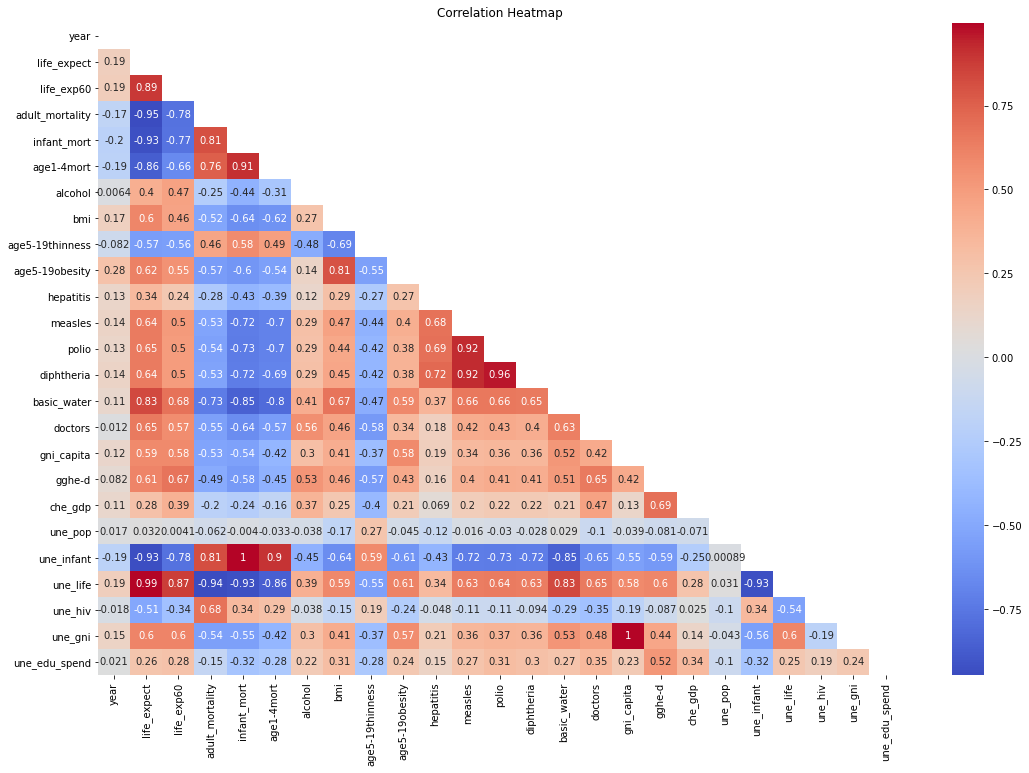

In [13]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
dataplot = sns.heatmap(corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap")
plt.show()

**Nhận xét:** Từ Heatmap trên, ta rút ra:
* Các cặp (`une_life`, `life_expect`), (`une_infant`, `infant_mort`) và (`une_gni`, `gni_capita`) có độ tương quan cao thể hiện sự đồng biến (0.99 và 1.00). 
* Các cặp (`adult_mortality`, `life_expect`), (`une_life`, `adult_mortality`), (`une_life`, `infant_mort`),... có độ tương quan thấp (nghịch biến).
* Các mối quan hệ giữa 2 cột có độ tương quan càng cao hoặc càng thấp (nghĩa là càng tiến về 1 nếu đồng biến hoặc -1 nếu nghịch biến) càng có sự ảnh hưởng lẫn nhau và được xem là "good relationship". Các mối quan hệ có độ tương quan càng tiến về 0 cho thấy sự thay đổi giữa 2 cột không ổn định (nghĩa là khi cột này tăng, cột kia có thể tăng hoặc giảm, không có sự ổn định nhất định).

#### Tiền xử lý

Quan sát các cặp cột có độ tương quan là 1.00 ở nhận xét trên, kết hợp với việc khảo sát sự phân bổ các giá trị numeric ở trên, ta thấy rằng: 
* Với 2 cột `une_infant` và `infant_mort`, tỉ lệ thiếu cả 2 cột là 0%, các giá trị về min, max, mean đều xấp xỉ nhau, chỉ khác về đơn vị (`une_infant` được tính trên 1000 người). 
* Với 2 cột `une_gni`, `gni_capita`, cột `gni_capita` có tỉ lệ thiếu là 21.92% trong khi đó cột `une_gni` tỉ lệ thiếu là 3.76%. 
Do đó, ta tiến hành loại bỏ các cột `infant_mort` và `gni_capita`

In [14]:
life_exp_pro_df = life_exp_pro_df.drop(columns=['infant_mort','gni_capita'])
life_exp_pro_df.shape

(3111, 26)

### Khám phá dữ liệu (tiếp tục)

#### Kiểm tra dữ liệu có sự bất thường ở 4 cột country, country_code, region và year không? 

Mỗi nước phải được khảo sát trong 17 năm, liên tục từ 2000 đến 2016, country_code và region phải giống nhau qua từng năm ở mỗi nước qua trong các năm khảo sát. Kết quả được lưu vào biến `is_normal`, nếu biến này là `True` thì dữ liệu bình thường, hợp lý; ngược lại biến này mang giá trị là `False`.

In [15]:
values, counts = np.unique(life_exp_pro_df.groupby(['country', 'country_code', 'region']).size().values, \
                           return_counts=True)

max_year = life_exp_pro_df['year'].max()
min_year = life_exp_pro_df['year'].min()

num_countries = life_exp_pro_df['country'].nunique()

if len(values) == 1 and len(counts) == 1 \
    and values[0] == max_year - min_year + 1 and counts[0] == num_countries:
    is_normal = True
else: 
    is_normal = False
    
is_normal

True

#### Khảo sát về tuổi thọ kỳ vọng ở các quốc gia

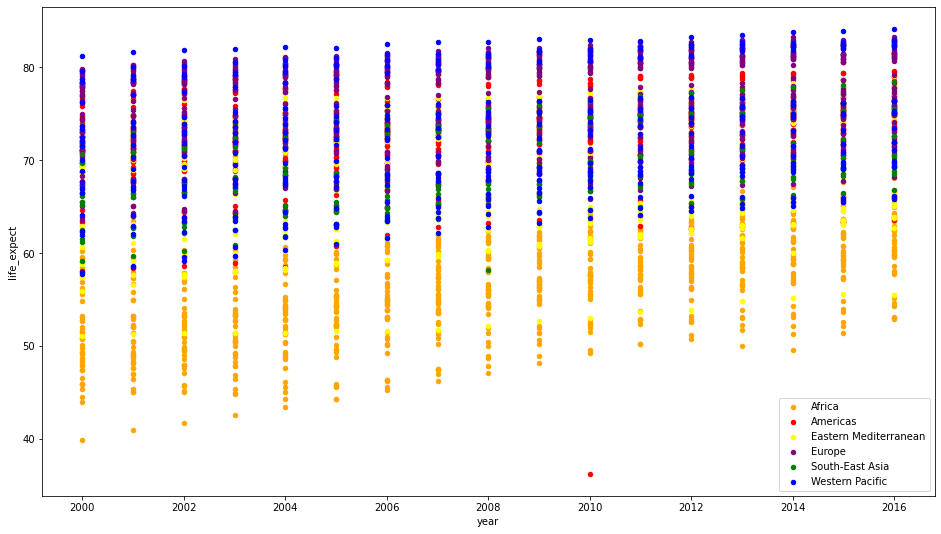

In [16]:
fig, ax = plt.subplots(figsize=(16, 9))

cdict = {'Africa': 'orange', 'Americas': 'red', 'Western Pacific': 'blue', \
         'South-East Asia': 'green', 'Europe': 'purple', 'Eastern Mediterranean':'yellow'}

grouped = life_exp_pro_df.groupby('region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='year', y='life_expect', label=key, color=cdict[key])
plt.show()

**Nhận xét:** Ta thấy dữ liệu có 1 điểm bất thường, điểm này thể hiện ở khu vực châu Mỹ vào năm 2010. Ta tiếp tục khảo sát tỉ lệ tử vong xem có gì bất thường không?

Để có thể lấy được tỉ lệ tử vong, ta cần tính tổng 3 cột thể hiện tỉ lệ tử vong vốn có là `une_infant` (Tỉ lệ tử vong trẻ sơ sinh), `age1-4mort` (Tỉ lệ tử vong từ 1-4 tuổi) và `adult_mortality` (Tỉ lệ tử vong ở người trưởng thành).

Tuy nhiên để làm được việc này ta cũng cần biến đổi cột `age1-4mort` từ đơn vị tỉ lệ trên tổng số dân thành trên 1000 người giống 2 cột còn lại. Ta sẽ nhân cột `age1-4mort` cho 1000.

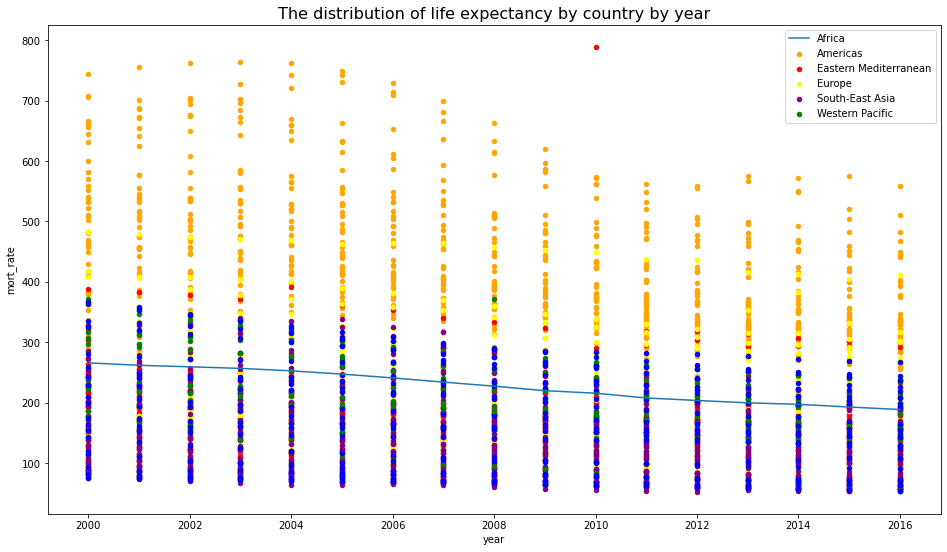

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))

mort_df = life_exp_pro_df[['region', 
                           'year',
                           'country']]
mort_df.insert(mort_df.shape[1], "mort_rate", life_exp_pro_df['une_infant'] \
                        + life_exp_pro_df['age1-4mort'] * 1000 \
                        + life_exp_pro_df['adult_mortality'])
# mort_df.['mort_rate'] = ...
mean_mort = mort_df.groupby('year')['mort_rate'].mean()
mean_mort.plot.line()
grouped = mort_df.groupby('region')

cdict = {'Africa': 'orange', 'Americas': 'red', 'Western Pacific': 'blue', \
         'South-East Asia': 'green', 'Europe': 'purple', 'Eastern Mediterranean':'yellow'}

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='year', y='mort_rate', label=key, color=cdict[key])
    
plt.title('The distribution of life expectancy by country by year',size=16)
plt.show()

**Nhận xét:** Tỉ lệ tử vong của 1 quốc gia nào đó ở chây Mỹ năm 2010 tăng bất thường. Ta kiểm tra xem đây là quốc gia nào.

In [18]:
ame_2010_df = mort_df[(mort_df['region'] == 'Americas') 
                          & (mort_df['year'] == 2010)]
idx_max = ame_2010_df['mort_rate'].idxmax()
max_mort_country = ame_2010_df.loc[idx_max]['country']
mort_df[mort_df['country'] == max_mort_country]

,region,year,country,mort_rate
1156,Americas,2000,Haiti,388.0838
1157,Americas,2001,Haiti,383.1980
1158,Americas,2002,Haiti,377.7411
1159,Americas,2003,Haiti,372.1137
1160,Americas,2004,Haiti,391.5365
1161,Americas,2005,Haiti,361.4985
1162,Americas,2006,Haiti,352.5454
1163,Americas,2007,Haiti,340.4888
1164,Americas,2008,Haiti,333.3753
1165,Americas,2009,Haiti,322.6790


Vậy quốc gia gây ra outlier chính là Haiti, với tỉ lệ tử vong năm 2010 vào xấp xỉ 789/1000 người, tăng khoảng gấp đôi so với các năm còn lại. Khám phá thêm về Haiti năm 2010 ta tìm được thông tin về [trận động đất năm 2010](https://www.history.com/this-day-in-history/massive-earthquake-strikes-haiti) gây thương vong vào khoản 200,000 người. Đó là nguyên nhân gây ra outlier trong tập dữ liệu.

Ta nhận thấy có thể dùng dataframe `mort_df` đã có để khảo sát thêm liệu còn các trường hợp quốc gia nào có biến động tương tự hay không. Ta sẽ vẽ line graph cho từng quốc gia trong từng khu vực qua các năm.

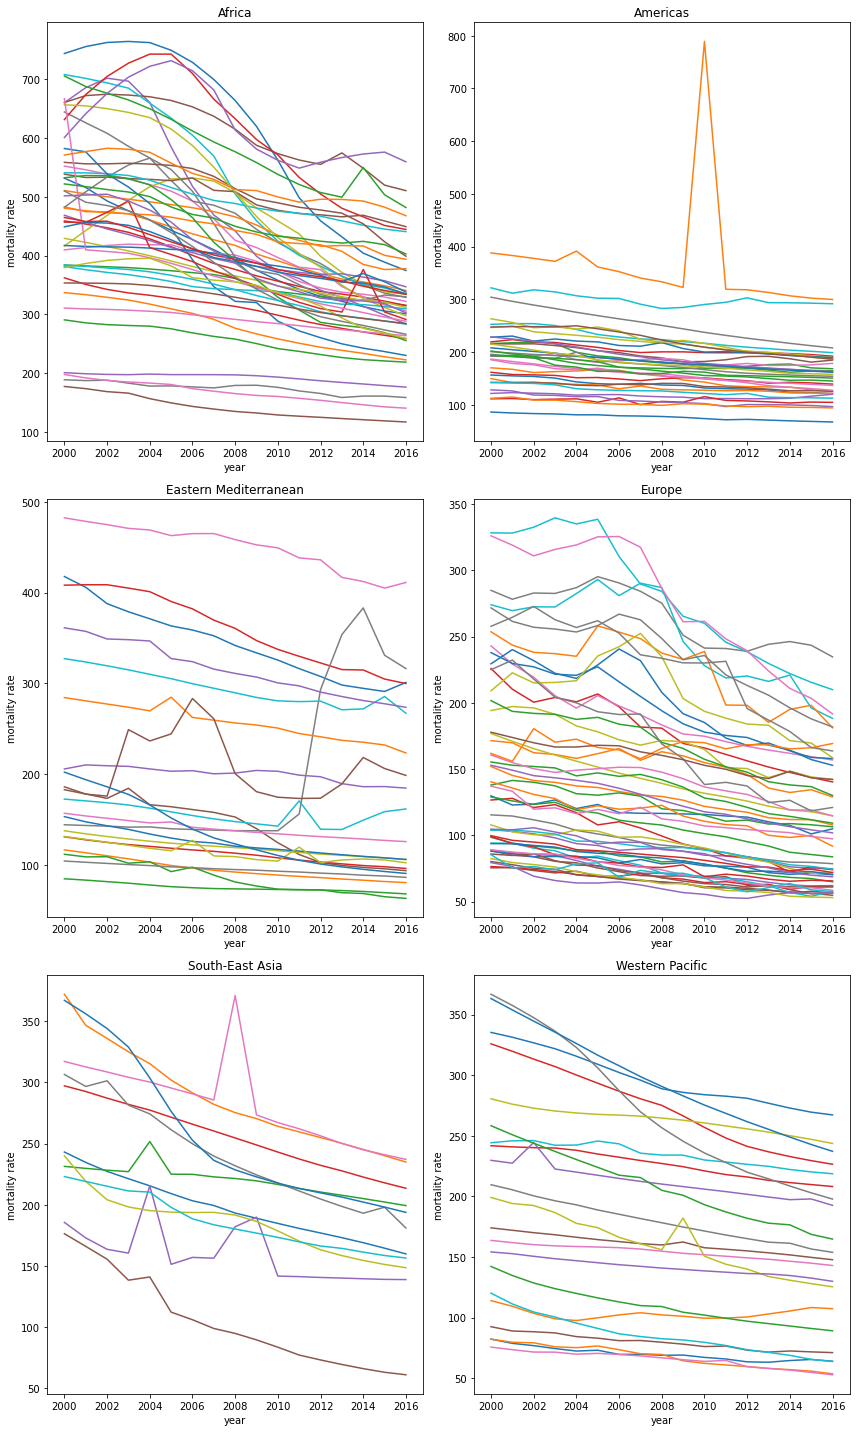

In [19]:
region_names = mort_df['region'].unique()
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(12.0, 20.0)
for ireg, region in enumerate(region_names):
    ix = ireg//2
    iy = ireg%2
    axs[ix, iy].set_title(region)
    temp_df = mort_df[mort_df['region'] == region]
    for country in temp_df['country'].unique():
        axs[ix, iy].plot(temp_df[temp_df['country']==country]['year'], 
                         temp_df[temp_df['country']==country]['mort_rate'])
    axs[ix, iy].set_xlabel('year')
    axs[ix, iy].set_ylabel('mortality rate')
plt.tight_layout()
plt.show()

Ngoài khu vực Americas ra, khu vực SEA có một quốc gia cũng tăng đột tiến tỉ lệ tử vong vào năm 2008. Ta sẽ xem đây là quốc gia nào.

In [20]:
sea_2008_df = mort_df[(mort_df['region'] == 'South-East Asia') 
                          & (mort_df['year'] == 2008)]
idx_max = sea_2008_df['mort_rate'].idxmax()
max_mort_country = sea_2008_df.loc[idx_max]['country']
mort_df[mort_df['country'] == max_mort_country]

,region,year,country,mort_rate
2669,South-East Asia,2000,Myanmar,317.1834
2670,South-East Asia,2001,Myanmar,312.6910
2671,South-East Asia,2002,Myanmar,308.5709
2672,South-East Asia,2003,Myanmar,304.2299
2673,South-East Asia,2004,Myanmar,300.3090
2674,South-East Asia,2005,Myanmar,295.4544
2675,South-East Asia,2006,Myanmar,290.6440
2676,South-East Asia,2007,Myanmar,285.6596
2677,South-East Asia,2008,Myanmar,371.0818
2678,South-East Asia,2009,Myanmar,273.4639


Vậy quốc gia đó là Myanmar. Sau khi nhóm em thử tra cứu về Myanmar năm 2008 thì tìm hiểu được vào ngày 2/5/2008 có [cơn bão Nargis](https://en.wikipedia.org/wiki/Cyclone_Nargis) diễn ra khiến ít nhất 138,373 người thiệt mạng. Như vậy xảy ra outlier này là hoàn toàn hợp lý.

Ngoài ra thấy ở khu vực Eastern Mediterranean cũng có một quốc gia có tỉ lệ tử vong tăng liên tục từ năm 2011 đến năm 2014. Ta khảo sát thử xem đây là quốc gia nào.

In [21]:
 mort_dif_df = mort_df[(mort_df['region'] == 'Eastern Mediterranean') 
                          & ((mort_df['year'] == 2011) \
                             | (mort_df['year'] == 2014))]
idx_max = pd.DataFrame(abs(mort_dif_df['mort_rate'].values[1::2] \
                           - mort_dif_df['mort_rate'].values[::2]), 
             columns=['mort_rate']).idxmax()
EM_country = mort_dif_df.reset_index().loc[idx_max * 2]['country'].values[0]
mort_df[mort_df['country'] == EM_country]

,region,year,country,mort_rate
1479,Eastern Mediterranean,2000,Syrian Arab Republic,144.5204
1480,Eastern Mediterranean,2001,Syrian Arab Republic,143.7098
1481,Eastern Mediterranean,2002,Syrian Arab Republic,143.0118
1482,Eastern Mediterranean,2003,Syrian Arab Republic,141.8945
1483,Eastern Mediterranean,2004,Syrian Arab Republic,142.1235
1484,Eastern Mediterranean,2005,Syrian Arab Republic,140.0798
1485,Eastern Mediterranean,2006,Syrian Arab Republic,139.2903
1486,Eastern Mediterranean,2007,Syrian Arab Republic,138.5614
1487,Eastern Mediterranean,2008,Syrian Arab Republic,138.0295
1488,Eastern Mediterranean,2009,Syrian Arab Republic,137.8754


Vậy quốc gia đó là Ả Rập Syrian. Ta sẽ  Sau khi tìm hiểu về Syrian năm 2011, nhóm đã phát hiện từ tháng 3 năm 2011 Syrian xảy ra [cuộc nội chiến đa đảng](https://en.wikipedia.org/wiki/Human_rights_in_Syria) và kéo dài đến tận ngày nay, gây thương vong về người rất lớn. Theo số liệu, tỉ lệ tử vong tăng mạnh (khoảng gấp đôi) từ 2011 đến 2014 và vẫn còn cao trong những năm sau đó.

- Ta thấy cần loại bỏ outlier của quốc gia Haiti vì mức tăng là khoảng 200% gây ra để tránh kết quả xấu khi thực hiện phân tích dữ liệu. 
- Trái lại, đối với trường hợp Myanmar, outlier này có mức tăng không đáng kể như Haiti. Ta không cần loại outlier này.
- Đối với Ả Rập Syrian, tuy mức tăng cũng vào khoảng trên 200% (năm 2014 so với 2011) nhưng những năm sau đó tỉ lệ tử vong ổn định và không có đột biến. Ta cũng giữ lại không loại outlier này.

=> Ta sẽ tiến hành loại dòng dữ liệu Haiti năm 2010

In [22]:
life_exp_pro_df.drop(life_exp_pro_df[(life_exp_pro_df['country'] == 'Haiti') 
                             & (life_exp_pro_df['year'] == 2010)].index, 
                 inplace=True)
life_exp_pro_df.shape

(3110, 26)

#### Khảo sát cột Region

Quan sát một vài giá trị đầu và cuối của dữ liệu

In [23]:
life_exp_pro_df

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,age1-4mort,alcohol,bmi,...,basic_water,doctors,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.025695,1.47439,21.7,...,41.14431,NaN,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,2.60753
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.024500,1.94025,21.8,...,42.25467,NaN,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.023260,2.07512,21.9,...,43.37680,NaN,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.021925,2.20275,22.0,...,44.36387,NaN,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.020545,2.41274,22.2,...,45.35134,0.621,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,64.49448,16.57977,209.2666,0.004845,6.29833,22.4,...,72.07056,1.800,0.43670,2.07638,6444.530,47.5,65.267,0.3,4570.0,1.82147
3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,64.79716,16.64219,205.1459,0.004600,6.42186,22.6,...,74.05544,4.493,0.71266,2.39985,6541.304,45.6,65.717,0.3,4980.0,3.23381
3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,65.10757,16.70787,200.8204,0.004405,6.64447,22.7,...,76.02924,4.949,0.68373,2.29846,6639.756,43.7,66.144,0.3,5440.0,2.93781
3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,65.45008,16.77074,196.6613,0.004160,6.83826,22.8,...,77.99142,NaN,0.86391,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN


**Nhận xét:** Nước Lào thuộc vào khu vực Tây Thái Bình Dương (đáng lẽ theo lẽ thường Lào phải thuộc về Đông Nam Á (South-East Asia)). Ta kiểm tra kỹ hơn về các khu vực có trong tập dữ liệu.

**Có tất cả bao nhiêu khu vực và đó là những khu vực nào?**

In [24]:
life_exp_pro_df.groupby(['region']).size() / (max_year - min_year + 1)

region
Africa                   47.000000
Americas                 32.941176
Eastern Mediterranean    21.000000
Europe                   50.000000
South-East Asia          11.000000
Western Pacific          21.000000
dtype: float64

Có 6 khu vực trong tập dữ liệu, khu vực châu Phi có 47 nước, châu Mỹ 33 nước, Đông Địa Trung Hải 21 nước, châu Âu 50 nước, Đông Nam Á 11 nước, Tây Thái Bình Dương 21 nước. Tiếp túc kiểm tra 2 khu vực Tây Thái Bình Dương và Đông Nam Á, xem thử có nước nào như nước Lào không?

In [25]:
life_exp_pro_df[life_exp_pro_df['region'] == 'Western Pacific']['country'].unique()

array(['Australia', 'Brunei Darussalam', 'China', 'Fiji',
       'Micronesia (Federated States of)', 'Tonga', 'Viet Nam', 'Vanuatu',
       'Samoa', 'Philippines', 'Papua New Guinea', 'Singapore',
       'Solomon Islands', 'Mongolia', 'Malaysia', 'New Zealand', 'Japan',
       'Cambodia', 'Kiribati', 'Republic of Korea',
       "Lao People's Democratic Republic"], dtype=object)

In [26]:
life_exp_pro_df[life_exp_pro_df['region'] == 'South-East Asia']['country'].unique()

array(['Bangladesh', 'Bhutan', 'Indonesia', 'India', 'Sri Lanka',
       'Maldives', 'Myanmar', 'Nepal',
       "Democratic People's Republic of Korea", 'Thailand', 'Timor-Leste'],
      dtype=object)

**Nhận xét:** Dường như cột `region` không phân chia theo khu vực mà đã học trong môn địa lý. Theo nhóm em có tìm hiểu thì WHO sẽ chia các nước trên thế giới thành 6 khu vực, ở mỗi khu vực sẽ có các văn phòng tương ứng. Cụ thể có thể xem tại [đây](https://www.who.int/about/who-we-are/regional-offices) hoặc [Wikipedia](https://en.wikipedia.org/wiki/List_of_WHO_regions).

---

## Đưa ra câu hỏi cần trả lời

### Các câu hỏi có ý nghĩa

* **Câu hỏi 1:** Các quốc gia và khu vực trên thế giới có tuổi thọ biến động như thế nào từ năm 2000 đến năm 2016? Việt Nam có tuổi thọ như thế nào so với các quốc gia khác trên thế giới và khu vực?
	
* **Câu hỏi 2:** Các vấn đề về y tế, kinh tế, xã hội có tác động như thế nào đến tuổi thọ của các quốc gia và các khu vực trên thế giới trong những năm 2000 đến năm 2016?

* **Câu hỏi 3:** Các vấn đề về y tế, kinh tế, xã hội ở các quốc gia đang phát triển và các quốc gia phát triển có gì khác biệt không? Nếu có thì sự khác biệt này như thế nào?

### Phân tích dữ liệu để trả lời cho các câu hỏi 

#### Câu hỏi 1: Các quốc gia và khu vực trên thế giới có tuổi thọ biến động như thế nào từ năm 2000 đến năm 2016? Việt Nam có tuổi thọ như thế nào so với các quốc gia khác trên thế giới và khu vực?

**Ý nghĩa khi trả lời câu hỏi:** Biết được cái nhìn tổng quan về tuổi thọ trung bình của các quốc gia (trong đó có Việt Nam) cũng như các khu vực trên thế giới, cụ thể: 
* Về phía Chính phủ, Nhà nước: Biết được quốc gia mình đang ở vị trí nào trong khu vực và thế giới, từ đó đề ra các giải pháp, chiến lược để duy trì và phát huy nhằm đạt được tuổi thọ trung bình cao hơn.
* Về phía người dân: có thể là **một trong số** các nhân tố dùng để tham khảo khi có ý định du học, định cư,...
* Ngoài ra, tạo tiền đề để các phân tích, nghiên cứu khác ra đời.

**Hướng tiếp cận để trả lời câu hỏi:**
Để trả lời câu hỏi này, nhóm tiếp cận theo hướng tách nhỏ thành các câu hỏi nhỏ hơn, cụ thể:
* Tổng quan thế giới:
    * Tuổi thọ trung bình trên thế giới biến động như thế nào qua các năm?
* Về phía từng quốc gia: 
    * Tuổi thọ trung bình của các quốc gia như thế nào?
    * Top 10 quốc gia có tuổi thọ trung bình cao nhất, thấp nhất?
    * Độ chênh lệch tuổi thọ năm 2016 và năm 2000 của các quốc gia như thế nào? 
    * Giải thích sự biến động về mặt tuổi thọ trung bình của các quốc gia trên thế giới.
* Về phía từng khu vực:
    * Tuổi thọ trung bình của các khu vực như thế nào? Đâu là khu vực có tuổi thọ trung bình cao nhất, thấp nhất?
    * Nhận xét về sự phân bố tuổi thọ trung bình của các khu vực trên thế giới.
* Về tuổi thọ của Việt Nam:
    * Việt Nam đang ở vị trí nào về mặt tuổi thọ trên thế giới và trong khu vực? 
    * Tốc độ biến động tuổi thọ ở Việt Nam qua các năm có xu hướng như thế nào?

##### Tổng quan thế giới

**Tuổi thọ trung bình trên thế giới biến động như thế nào qua các năm?**

Các bước thực hiện: 
* **Bước 1:** Tính trung bình tuổi thọ của 183 quốc gia trong tập dữ liệu theo từng năm. 
* **Bước 2:** Vẽ đồ thị thể hiện sự biến động tuổi thọ trung bình của các quốc gia trên thế giới. 
* **Bước 3:** Vẽ đồ thị histogram thể hiện phân phối tuổi thọ trung bình của thế giới năm 2000 và 2016.
* **Bước 4:** Kết luận.

**Bước 1:** Tính trung bình tuổi thọ của 183 quốc gia trong tập dữ liệu theo từng năm. Kết quả được lưu vào `life_exp_mean`

Tiến hành gom nhóm dữ liệu theo năm (`year`). Sau đó, tính trung bình trên cột `life_expect`. Kết quả thu được lưu vào Series `life_exp_mean`.

In [27]:
life_exp_mean = life_exp_pro_df.groupby('year').agg(pd.Series.mean)['life_expect']
life_exp_mean

year
2000    66.381261
2001    66.759911
2002    66.981275
2003    67.194990
2004    67.536497
2005    67.918202
2006    68.382742
2007    68.817387
2008    69.228267
2009    69.679568
2010    70.097304
2011    70.457992
2012    70.722041
2013    71.026033
2014    71.225480
2015    71.476842
2016    71.787813
Name: life_expect, dtype: float64

**Bước 2:** Vẽ đồ thị đường thể hiện sự biến động tuổi thọ trung bình của các quốc gia trên thế giới

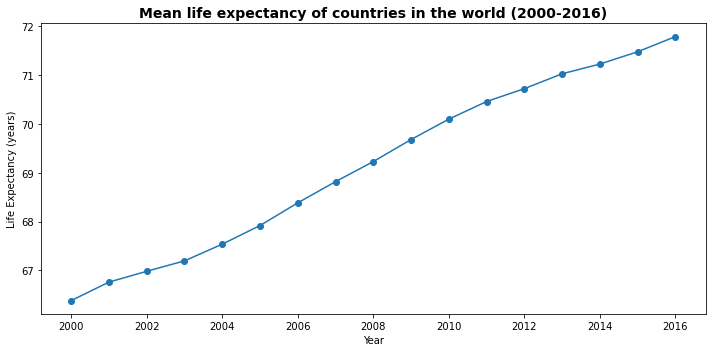

In [28]:
fig = plt.figure(figsize = (10, 5))
 
life_exp_mean.plot.line(ylabel='Life Expectancy (years)',xlabel='Year', marker='o')
 
plt.title("Mean life expectancy of countries in the world (2000-2016)", weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

**Nhận xét:** Tuổi thọ trung bình của thế giới tăng qua các năm, cụ thể năm 2016 tăng so với năm 2000 khoảng 5 tuổi (~8.14%). Nguyên nhân có lẽ là do thế giới ngày càng phát triển và hiện đại, sức khỏe được quan tâm hơn trước dẫn đến tuổi thọ tăng.

**Bước 3:** Vẽ đồ thị histogram thể hiện phân phối tuổi thọ trung bình của thế giới năm 2000 và 2016

Để phân tích rõ hơn sự biến động tuổi thọ ở năm 2000 và năm 2016, tiến hành vẽ biểu đồ histogram và đường biểu diễn mật độ số lượng quốc gia thể hiện sự phân phối tuổi thọ trung bình. Nhóm sử dụng thư viện Seaborn để hỗ trợ vẽ kết hợp biểu đồ histogram và đường mật độ thay vì thư viện Matplotlib.

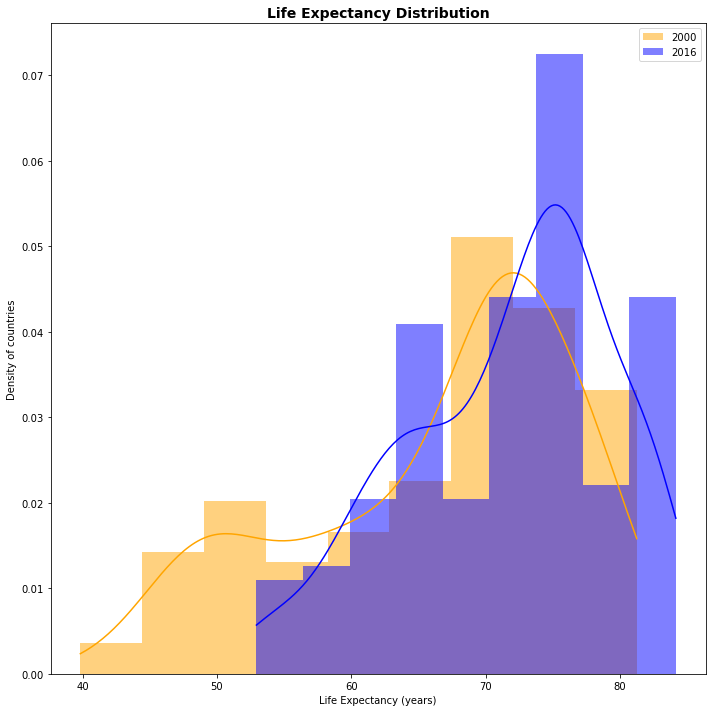

In [29]:
fig = plt.figure(figsize = (10, 10))

sns.histplot(life_exp_pro_df[life_exp_pro_df.year.eq(life_exp_pro_df.year.min())]["life_expect"],
             color='orange', label=str(life_exp_pro_df.year.min()),
             kde=True, stat="density", linewidth=0)
sns.histplot(life_exp_pro_df[life_exp_pro_df.year.eq(life_exp_pro_df.year.max())]["life_expect"],
             color='blue', label=str(life_exp_pro_df.year.max()),
             kde=True, stat="density", linewidth=0)
plt.legend()
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Density of countries")
plt.title("Life Expectancy Distribution",
          fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

**Nhận xét:** Ta thấy sự khác biệt về tuổi thọ giữa các quốc gia có xu hướng giảm xuống và có sự gia tăng tuổi thọ từ năm 2000 đến năm 2016.

**Bước 4:**  Kết luận

Nhìn chung về tổng quan thế giới, xu hướng tuổi thọ trung bình có sự gia **tăng** qua từng năm. 

##### Về các quốc gia

**Tuổi thọ trung bình của các quốc gia như thế nào?**

Các bước thực hiện: 
* Bước 1: Tính trung bình tuổi thọ của **từng** quốc gia trong tập dữ liệu trong 17 năm từ năm 2000 đến 2016.
* Bước 2: Trực quan hóa giá trị đã tính ở bước 1. 
* Bước 3: Tách dataframe gồm năm, quốc gia, khu vực và tuổi thọ
* Bước 4: Tính toán để đưa ra các quốc gia có tuổi thọ cao nhất ở từng năm
* Bước 5: Tính toán để đưa ra các quốc gia có tuổi thọ thấp nhất ở từng năm
* Bước 6: Viết hàm để trực quan hóa các kết quả đã tính ở bước 4,5
* Bước 7: Trực quan hóa các quốc gia có tuổi thọ cao nhất, thấp nhất ở từng năm
* Bước 8: Đưa ra nhận xét

**Bước 1:** Tính trung bình tuổi thọ của **từng** quốc gia trong tập dữ liệu trong 17 năm từ năm 2000 đến 2016.

Tiến hành gom nhóm dữ liệu theo quốc gia (`country`). Sau đó, tính trung bình trên cột `life_expect`, cuối cùng sắp xếp kết quả theo thứ tự tăng dần dựa trên `life_expect`. Kết quả thu được lưu vào Series `life_exp_country`.

In [30]:
life_exp_country =  life_exp_pro_df.groupby(['country','region']).agg(pd.Series.mean)['life_expect'].sort_values()
life_exp_country_df = life_exp_country.to_frame().reset_index()
life_exp_country_df

,country,region,life_expect
0,Sierra Leone,Africa,46.791260
1,Central African Republic,Africa,48.215201
2,Lesotho,Africa,49.927415
3,Eswatini,Africa,50.260278
4,Chad,Africa,50.831692
...,...,...,...
178,Italy,Europe,81.490516
179,Iceland,Europe,81.507846
180,Australia,Western Pacific,81.543989
181,Switzerland,Europe,81.848187


**Bước 2:** Trực quan hóa giá trị đã tính ở bước 1. 


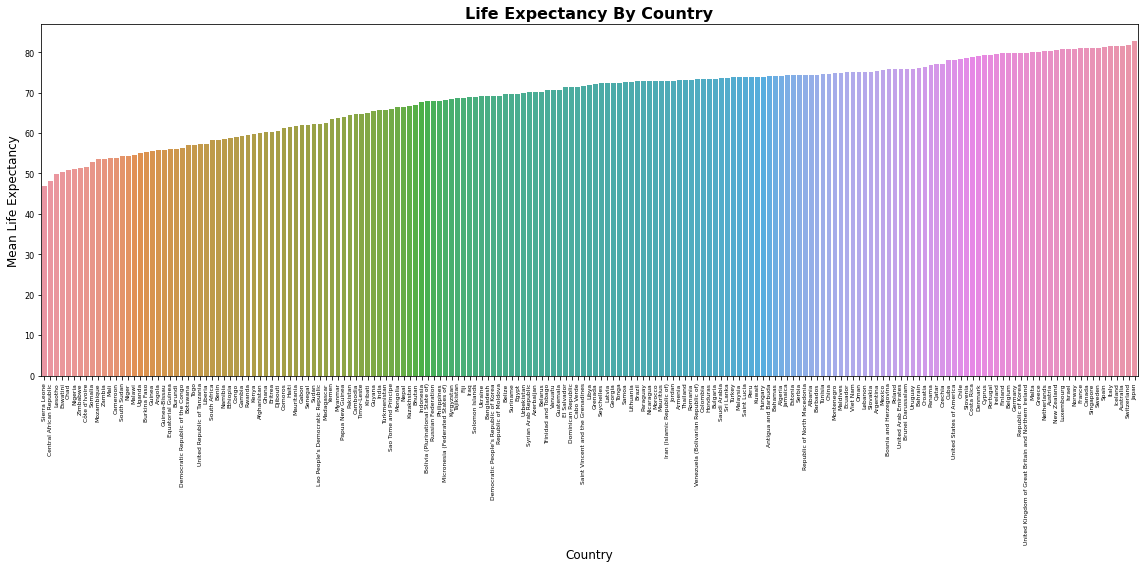

In [31]:
# Make barplot and sort bars by height
plt.figure(figsize=(16, 8))
sns.barplot(x=life_exp_country_df['country'],
            y=life_exp_country_df['life_expect'])

# Format axis' ticks
plt.xticks(fontsize=6, rotation=90)
plt.yticks(fontsize=8)

# Format labels and title
plt.xlabel('Country', size=12)
plt.ylabel("Mean Life Expectancy", size=12)
plt.title("Life Expectancy By Country",
          size=16, weight='bold')

plt.tight_layout()

**Nhận xét:** Nhật Bản là quốc gia có tuổi thọ trung bình cao nhất thế giới (2000 - 2016) với 82.75 năm, trong khi đó Sierra Leone là quốc gia có tuổi thọ trung bình thấp nhất với 46.79 năm. 

**Bước 3:** Tách dataframe gồm năm, quốc gia, khu vực và tuổi thọ và lưu vào biến `year_country_df`

In [32]:
year_country_df = life_exp_pro_df[['year', 'country', 'region', 'life_expect']]

**Bước 4:** Tính toán để đưa ra các quốc gia có tuổi thọ cao nhất ở từng năm.

Đầu tiên tìm index của các quốc gia có tuổi thọ cao nhất theo từng năm, sau đó dựa vào index vừa tìm được để truy xuất ra các quốc gia có tuổi thọ cao nhất và lưu vào biến `countries_max`.

In [33]:
idx_max =  year_country_df.groupby(['year'])['life_expect'].idxmax()
countries_max = year_country_df.loc[idx_max]
countries_max

,year,country,region,life_expect
3026,2000,Japan,Western Pacific,81.25787
3027,2001,Japan,Western Pacific,81.61861
3028,2002,Japan,Western Pacific,81.92406
3029,2003,Japan,Western Pacific,81.99335
3030,2004,Japan,Western Pacific,82.24093
3031,2005,Japan,Western Pacific,82.09901
3032,2006,Japan,Western Pacific,82.50803
3033,2007,Japan,Western Pacific,82.69934
3034,2008,Japan,Western Pacific,82.78172
3035,2009,Japan,Western Pacific,83.09043


**Bước 5:** Tính toán để đưa ra các quốc gia có tuổi thọ thấp nhất ở từng năm.

Đầu tiên tìm index của các quốc gia có tuổi thọ thấp nhất theo từng năm, sau đó dựa vào index vừa tìm được để truy xuất ra các quốc gia có tuổi thọ thấp nhất và lưu vào biến `countries_min`.

In [34]:
idx_min =  year_country_df.groupby(['year'])['life_expect'].idxmin()
countries_min = year_country_df.loc[idx_min]
countries_min

,year,country,region,life_expect
374,2000,Sierra Leone,Africa,39.82734
375,2001,Sierra Leone,Africa,40.87128
376,2002,Sierra Leone,Africa,41.69998
377,2003,Sierra Leone,Africa,42.50437
378,2004,Sierra Leone,Africa,43.35558
379,2005,Sierra Leone,Africa,44.23780
380,2006,Sierra Leone,Africa,45.24142
381,2007,Sierra Leone,Africa,46.19519
382,2008,Sierra Leone,Africa,47.09497
383,2009,Sierra Leone,Africa,48.09219


**Bước 6:** Viết hàm để trực quan hóa các kết quả đã tính ở bước 4,5

In [35]:
YEARS = tuple(set(life_exp_pro_df['year'].to_numpy()))

In [36]:
def plot_timeline_countries(title, countries): 
    levels = np.tile([-5, 5, -3, 3, -1, 1],
                         int(np.ceil(len(YEARS)/6)))[:len(YEARS)]
    # Create figure
    fig, ax = plt.subplots(figsize=(18, 6), constrained_layout=True)
    plt.title(title, weight='bold', fontsize=20)

    # Plot stem plot; place vertical lines at each year from baseline to vertical levels
    markerline, stemline, baseline = ax.stem(YEARS, levels,\
                                             linefmt="C0-", basefmt="C9-",\
                                             use_line_collection=True)

    # Format markers
    plt.setp(markerline, mec='orange', mfc='orange', zorder=3)

    # Shift markers to the baseline by replacing y-data with zeros
    markerline.set_ydata(np.zeros(len(YEARS)))

    # Annotate stem lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for yr, l, c, v in zip(YEARS, levels, countries, vert):
        ax.annotate(c, xy=(yr, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points", va=v, ha="right", fontsize=12)

    # Format year tick labels 
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # Remove y-axis and lines denoting data area boundaries (spines)
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    # Set padding between stemlines and x-axis
    ax.margins(y=0.1)

**Bước 7:** Trực quan hóa các quốc gia có tuổi thọ cao nhất, thấp nhất ở từng năm

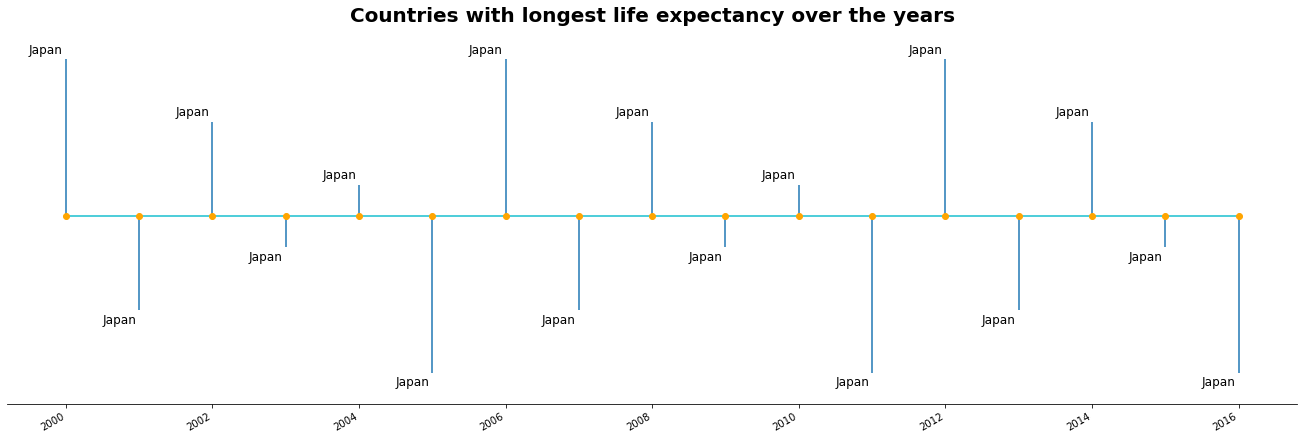

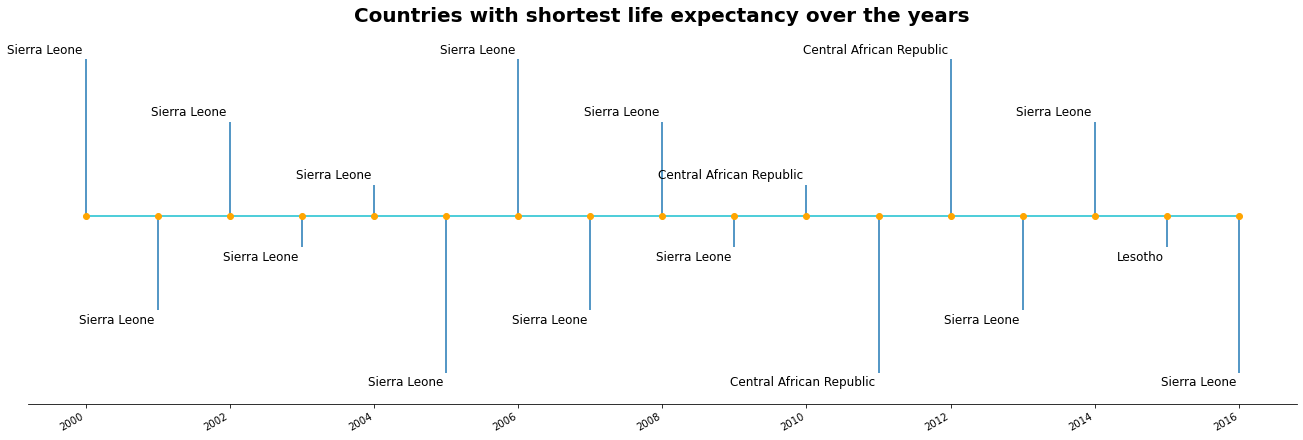

In [37]:
plot_timeline_countries("Countries with longest life expectancy over the years",\
                        countries_max['country'].to_numpy())
plot_timeline_countries("Countries with shortest life expectancy over the years",\
                        countries_min['country'].to_numpy())

**Bước 8:** Đưa ra nhận xét

* Nhật Bản là quốc gia liên tiếp có tuổi thọ cao nhất thế giới trong 17 năm khảo sát. Nguyên nhân theo nhóm tìm hiểu là do người Nhật chăm chỉ thể thao, ăn uống điều độ, nguồn gốc thực phẩm được kiểm định nghiêm ngặt,... do đó người Nhật Bản có được sức khỏe tốt, kéo dài tuổi thọ. 
* Sierra Leone, Central African Republic và Lesotho là 3 nước xuất hiện trong danh sách có tuổi thọ thấp nhất thế giới trong 17 năm khảo sát, trong đó Sierra Leone xuất hiện nhiều nhất (13 năm), Central African Republic (3 năm) và Lesotho (1 năm). Các nước này nằm cho khu vực châu Phi, có lẽ do các cuộc nội chiến, dịch vụ y tế còn yếu kém, vệ sinh an toàn thực phẩm không cao,... nên ảnh hưởng đến tuổi thọ ở các quốc gia này.

**Top 10 quốc gia có tuổi thọ trung bình cao nhất, thấp nhất?**

Các bước thực hiện: 
* **Bước 1:** Lấy ra 10 quốc gia có tuổi thọ trung bình cao nhất, 10 quốc gia có tuổi thọ trung bình thấp nhất.
* **Bước 2:** Vẽ biểu đồ tròn thể hiện sự phân bổ 10 quốc gia có tuổi thọ trung bình cao nhất / thấp nhất theo khu vực.
* **Bước 3:** Nhận xét

**Bước 1:** Lấy ra 10 quốc gia có tuổi thọ trung bình cao nhất, 10 quốc gia có tuổi thọ trung bình thấp nhất.

Với 10 quốc gia có tuổi thọ trung bình cao nhất, kết quả trả về được sắp xếp theo thứ tự giảm dần dựa trên `life_expect` và lưu vào `top_10_longest_life`. Tương tự, với 10 quốc gia có tuổi thọ trung bình thấp nhất, kết quả trả về được sắp xếp theo thứ tự tăng dần dựa trên `life_expect` và lưu vào `top_10_shortest_life`

In [38]:
top_10_longest_life = life_exp_country_df.tail(10).sort_values(by='life_expect', ascending=False)
top_10_longest_life

,country,region,life_expect
182,Japan,Western Pacific,82.753574
181,Switzerland,Europe,81.848187
180,Australia,Western Pacific,81.543989
179,Iceland,Europe,81.507846
178,Italy,Europe,81.490516
177,Spain,Europe,81.391195
176,Sweden,Europe,81.161942
175,Singapore,Western Pacific,81.070605
174,Canada,Americas,81.067231
173,France,Europe,81.029753


In [39]:
top_10_shortest_life = life_exp_country_df.head(10)
top_10_shortest_life

,country,region,life_expect
0,Sierra Leone,Africa,46.791260
1,Central African Republic,Africa,48.215201
2,Lesotho,Africa,49.927415
3,Eswatini,Africa,50.260278
4,Chad,Africa,50.831692
5,Nigeria,Africa,51.192344
6,Zimbabwe,Africa,51.274442
7,Côte d'Ivoire,Africa,51.484058
8,Somalia,Eastern Mediterranean,52.803960
9,Mozambique,Africa,53.536801


**Bước 2:** Vẽ biểu đồ tròn thể hiện sự phân bổ 10 quốc gia có tuổi thọ trung bình cao nhất / thấp nhất theo khu vực.

Đầu tiên, tính số lượng quốc gia trong các khu vực xuất hiện. Sau đó vẽ biểu đồ tròn thể hiện.

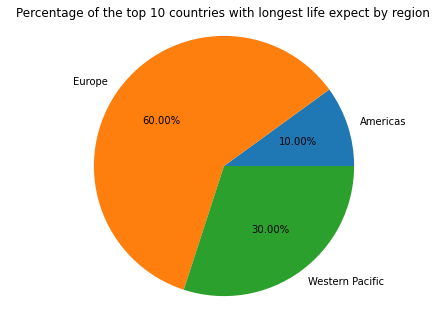

In [40]:
num_countries_region_longest = top_10_longest_life.groupby(['region']).size()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(num_countries_region_longest.values, labels = num_countries_region_longest.index,autopct='%1.2f%%')
ax.axis('equal')
ax.set_title('Percentage of the top 10 countries with longest life expect by region')
plt.show()

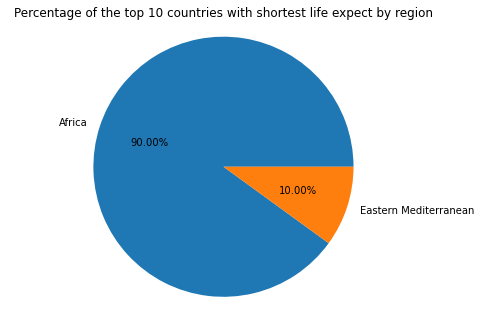

In [41]:
num_countries_region_shortest = top_10_shortest_life.groupby(['region']).size()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(num_countries_region_shortest.values, labels = num_countries_region_shortest.index,autopct='%1.2f%%')
ax.axis('equal')
ax.set_title('Percentage of the top 10 countries with shortest life expect by region')
plt.show()

**Bước 3:** Nhận xét
* Các quốc gia có tuổi thọ trung bình cao nhất tập trung ở khu vực châu Âu, kế đó là khu vực Tây Thái Bình Dương và khu vực châu Mỹ. 
* Các quốc gia có tuổi thọ trung bình thấp nhất tập trung chủ yếu ở khu vực châu Phi.

**Độ chênh lệch tuổi thọ năm 2016 và năm 2000 của các quốc gia như thế nào?**

Các bước thực hiện:
* **Bước 1:** Lọc ra danh sách các quốc gia (không trùng lắp) và lưu vào dataframe `change_life_exp_df`.
* **Bước 2:** Thêm vào dataframe `change_life_exp_df` cột `change` thể hiện sự thay đổi tuổi thọ giữa năm 2016 và 2000.
* **Bước 3:** Vẽ biểu đồ thể hiện và nhận xét.

**Bước 1:** Lọc ra danh sách các quốc gia (không trùng lắp) và lưu vào dataframe change_life_exp_df.

In [42]:
change_life_exp_df = pd.DataFrame(year_country_df['country'].unique(), columns = ['country'])
change_life_exp_df

,country
0,Angola
1,Burundi
2,Benin
3,Burkina Faso
4,Botswana
...,...
178,Japan
179,Cambodia
180,Kiribati
181,Republic of Korea


**Bước 2:** Thêm vào dataframe `change_life_exp_df` cột `change` thể hiện sự thay đổi tuổi thọ giữa năm 2016 và 2000.

In [43]:
change_life_exp = year_country_df[year_country_df['year'] == 2016]['life_expect'].values - \
year_country_df[year_country_df['year'] == 2000]['life_expect'].values
change_life_exp_df['change'] = change_life_exp
change_life_exp_df = change_life_exp_df.sort_values(by='change')
change_life_exp_df

,country,change
87,Syrian Arab Republic,-9.21462
95,Iraq,0.40497
142,Georgia,1.04762
52,Saint Vincent and the Grenadines,1.08184
99,Libya,1.15680
...,...,...
4,Botswana,16.94230
9,Zambia,17.90281
28,Malawi,18.27207
36,Eritrea,21.03411


**Bước 3:** Vẽ biểu đồ thể hiện và nhận xét.

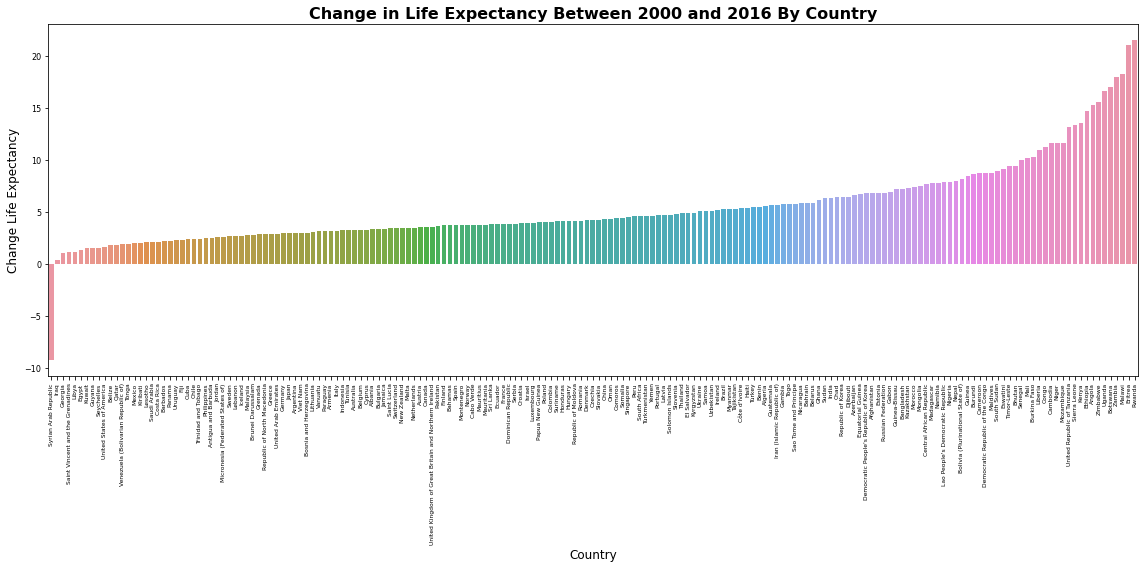

In [44]:
# Make barplot and sort bars by height
plt.figure(figsize=(16, 8))
sns.barplot(x='country',
            y='change',
            data=change_life_exp_df)

# Format axis' ticks
plt.xticks(fontsize=6, rotation=90)
plt.yticks(fontsize=8)

# Format labels and title
plt.xlabel('Country', size=12)
plt.ylabel("Change Life Expectancy", size=12)
plt.title("Change in Life Expectancy Between 2000 and 2016 By Country",
          size=16, weight='bold')

plt.tight_layout()

**Nhận xét:** Nhìn chung các quốc gia có sự gia tăng tuổi thọ năm 2016 so với năm 2000, riêng quốc gia Syrian Arab Republic có sự chênh lệch mang giá trị âm, nghĩa là tuổi thọ năm 2016 giảm so với năm 2000, nguyên nhân là do nước này xảy ra cuộc nội chiến vào năm 2011 như đã trình bày ở phần khám phá dữ liệu.

**Giải thích sự biến động về mặt tuổi thọ trung bình của các quốc gia trên thế giới**

##### Về phía từng khu vực

**Tuổi thọ trung bình của các khu vực như thế nào? Đâu là khu vực có tuổi thọ trung bình cao nhất, thấp nhất?**

Các bước thực hiện:
* **Bước 1:** Gom nhóm theo năm và khu vực và tính trung bình dựa trên `life_expect`.
* **Bước 2:** Vẽ biểu độ đường thể hiện sự biến động tuổi thọ trung bình theo khu vực.
* **Bước 3:** Tính tuổi thọ trung bình của các khu vực trên thế giới.

**Bước 1:** Gom nhóm theo năm và khu vực và tính trung bình dựa trên `life_expect`.

In [45]:
life_exp_region = life_exp_pro_df.groupby(['year', 'region']). \
    agg(pd.Series.mean)['life_expect'].unstack(1)
life_exp_region

region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
year,,,,,,
2000,52.999274,71.443474,68.020737,73.739848,65.011563,69.934060
2001,53.504793,71.615029,68.292038,74.125911,65.731345,70.265210
2002,53.740569,71.913870,68.540360,74.204803,66.258147,70.484835
2003,54.034095,72.026378,68.510414,74.378885,66.796707,70.846833
2004,54.573356,72.252660,68.823309,74.767340,66.521582,71.166642
2005,55.264759,72.580028,69.074587,74.801049,67.766700,71.447330
2006,56.068809,72.943390,69.221483,75.207786,68.162145,71.802466
2007,56.929432,73.228292,69.579324,75.442085,68.535135,72.105160
2008,57.764619,73.443950,69.973800,75.795832,68.246387,72.392083


**Bước 2:** Vẽ biểu độ đường thể hiện sự biến động tuổi thọ trung bình theo khu vực.

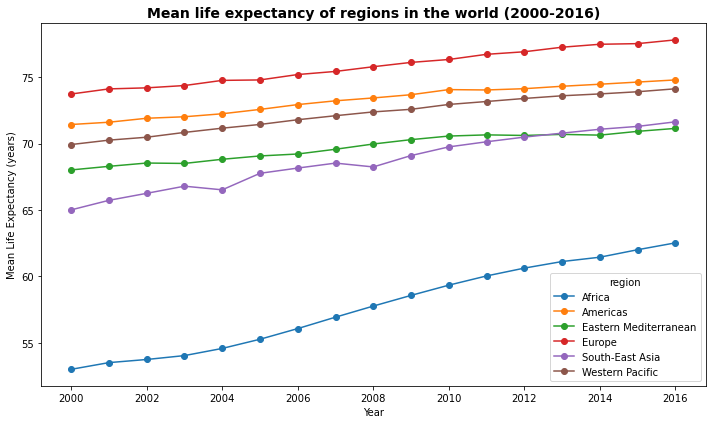

In [46]:
life_exp_region.plot.line(ylabel='Mean Life Expectancy (years)', xlabel='Year',\
                          marker='o', legend=True, figsize=(10,6))
plt.title("Mean life expectancy of regions in the world (2000-2016)", weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

**Bước 3:** Tính tuổi thọ trung bình của các khu vực trên thế giới.

In [47]:
life_exp_mean_region = life_exp_pro_df.groupby(['region']).agg(pd.Series.mean)['life_expect'].sort_values()
life_exp_mean_region

region
Africa                   57.679362
South-East Asia          68.667484
Eastern Mediterranean    69.741827
Western Pacific          72.233377
Americas                 73.271295
Europe                   75.805259
Name: life_expect, dtype: float64

**Nhận xét về sự phân bố tuổi thọ trung bình của các khu vực trên thế giới**

* Các khu vực có tuổi thọ trung bình không đồng đều. 
* Mỗi khu vực có sự biến động khác nhau (có năm tăng, có năm giảm) nhưng nhìn chung xu hướng tuổi thọ ở các khu vực tăng. 
* Khu vực châu Âu có tuổi thọ trung bình cao nhất (75.8 năm).
* Khu vực châu Phi có tuổi thọ trung bình thấp nhất (57.7 năm).
* Nguyên nhân dẫn đến sự không đồng đều này có thể là do mỗi khu vực có sự khác nhau về kinh tế, xã hội, y tế. Những yếu tố này sẽ được khảo sát kỹ ở Câu hỏi 2.

##### Về tuổi thọ của Việt Nam

**Việt Nam đang ở vị trí nào về mặt tuổi thọ trên thế giới và trong khu vực?**

Các bước thực hiện: 
* **Bước 1:** Lấy ra dòng có giá trị `country` là `Viet Nam` từ dataframe `life_exp_country_df`
* **Bước 2:** Lấy ra các quốc gia thuộc khu vực Western Pacific
* **Bước 3:** Lấy ra dòng có giá trị `country` là `Viet Nam` từ dataframe đã tính ở bước 2.

**Bước 1:** Lấy ra dòng có giá trị country là Viet Nam từ dataframe life_exp_country_df

In [48]:
life_exp_country_df[life_exp_country_df['country'] == 'Viet Nam']

,country,region,life_expect
135,Viet Nam,Western Pacific,75.041637


**Nhận xét:** Việt Nam đứng ở vị trí 182 - 135 + 1 = 48 (vì số đếm tính từ 0) trong tổng số 183 quốc gia về tuổi thọ trung bình (tính từ cao xuống thấp).

**Bước 2:** Lấy ra các quốc gia thuộc khu vực Western Pacific

In [49]:
life_exp_WP_df = life_exp_country_df[life_exp_country_df['region'] == 'Western Pacific']. \
                sort_values(by='life_expect', ascending=False).reset_index().drop(columns = ['index'])
print('So luong quoc gia trong khu vuc Tay Thai Binh Duong la: ', len(life_exp_WP_df))
life_exp_WP_df.head()

So luong quoc gia trong khu vuc Tay Thai Binh Duong la:  21


,country,region,life_expect
0,Japan,Western Pacific,82.753574
1,Australia,Western Pacific,81.543989
2,Singapore,Western Pacific,81.070605
3,New Zealand,Western Pacific,80.500392
4,Republic of Korea,Western Pacific,79.848656


**Bước 3:** Lấy ra dòng có giá trị `country` là `Viet Nam` từ dataframe đã tính ở bước 2.

In [50]:
life_exp_WP_df[life_exp_WP_df['country'] == 'Viet Nam']

,country,region,life_expect
6,Viet Nam,Western Pacific,75.041637


**Nhận xét:** Việt Nam đứng ở vị trí 7 (vì số đếm tính từ 0 và dataframe đã được sort giảm dần) trong tổng số 21 quốc gia thuộc khu vực Tây Thái Bình Dương về tuổi thọ trung bình (tính từ cao xuống thấp) với tuổi thọ trung bình là 79.85 tuổi.

**Tốc độ biến động tuổi thọ ở Việt Nam qua các năm có xu hướng như thế nào?**

Các bước thực hiện:
* **Bước 1:** Lấy ra dòng có giá trị `country` là `Viet Nam` từ dataframe `life_exp_pro_df`
* **Bước 2:** Vẽ biểu đồ đường thể hiện tuổi thọ của Việt Nam qua từng năm từ 2000 đến 2016

**Bước 1:** Lấy ra dòng có giá trị `country` là `Viet Nam` từ dataframe `life_exp_pro_df`

In [51]:
life_exp_VN = life_exp_pro_df[life_exp_pro_df['country'] == 'Viet Nam']
life_exp_VN.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,age1-4mort,alcohol,bmi,...,basic_water,doctors,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
2856,Viet Nam,VNM,Western Pacific,2000,73.34433,21.33619,138.5838,0.001640,0.71237,19.9,...,80.14247,NaN,1.69230,4.84927,79910.412,23.5,73.025,0.3,2180.0,NaN
2857,Viet Nam,VNM,Western Pacific,2001,73.61745,21.42135,137.5792,0.001610,0.76177,20.0,...,81.02645,5.242,1.51747,5.72811,80742.499,22.7,73.228,0.3,2350.0,NaN
2858,Viet Nam,VNM,Western Pacific,2002,73.94917,21.50571,136.8634,0.001545,0.81628,20.1,...,81.90405,5.514,1.66709,4.57059,81534.407,21.8,73.438,0.3,2510.0,NaN
2859,Viet Nam,VNM,Western Pacific,2003,74.26300,21.58560,136.6683,0.001475,0.92983,20.2,...,82.77435,NaN,1.53228,4.65505,82301.656,21.1,73.654,0.3,2700.0,NaN
2860,Viet Nam,VNM,Western Pacific,2004,74.52848,21.66266,136.7429,0.001430,1.12613,20.3,...,83.63763,NaN,1.72000,4.82393,83062.821,20.5,73.875,0.3,2970.0,NaN


**Bước 2:** Vẽ biểu đồ đường thể hiện tuổi thọ của Việt Nam qua từng năm từ 2000 đến 2016.

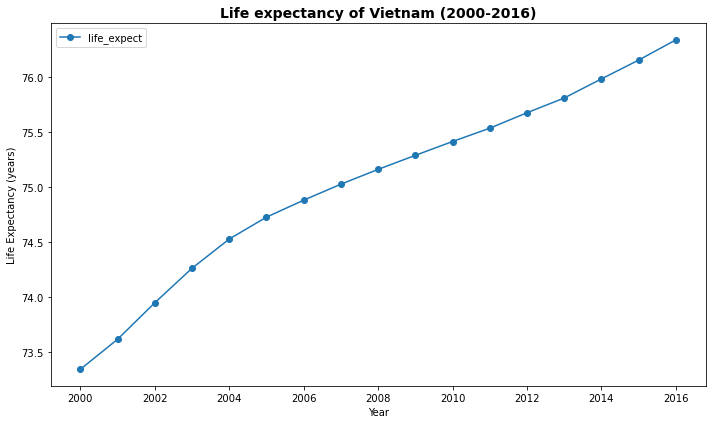

In [52]:
life_exp_VN.plot.line(x='year', y='life_expect', ylabel='Life Expectancy (years)', xlabel='Year',\
                          marker='o', legend=True, figsize=(10,6))
plt.title("Life expectancy of Vietnam (2000-2016)", weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

**Nhận xét:** Việt Nam có tuổi thọ tăng qua các năm, cụ thể là 73.34 tuổi ở năm 2000 đến 76.34 tuổi ở năm 2016. Điều này có thể được giải thích là do Việt Nam là nước đang phát triển, điều kiện về kinh tế, xã hội, giáo dục, y tế,... được đầu tư phát triển qua từng năm. Nhưng điều này cũng đồng nghĩa với việc dân số Việt Nam đang bị già hoá, do đó chính phủ cần có các biện pháp để thích ứng với việc già hóa dân số này.

#### Câu hỏi 2: Các vấn đề về y tế, kinh tế, xã hội có tác động như thế nào đến tuổi thọ của các quốc gia và các khu vực trên thế giới trong những năm 2000 đến năm 2016?

**Ý nghĩa khi trả lời câu hỏi:** Giải quyết được câu hỏi này sẽ giúp ta nhìn nhận rõ các yếu tố có thể làm tăng/giảm tuổi thọ kì vọng, từ đó đề xuất phương hướng đầu tư phát triển và cải thiện cho các nhóm quốc gia có tuổi thọ kì vọng chưa cao hoặc có những giải pháp phù hợp để thích ứng với xu hướng gia tăng tuổi thọ kì vọng.

**Đối với từng lĩnh vực:**
* Y tế: Khảo sát sự tác động của tỷ lệ tiêm chủng (viêm gan, sởi, bại liệt, bạch hầu) và mật độ bác sĩ.
* Kinh tế: Khảo sát sự tác động của tổng thu nhập quốc dân, chi tiêu của chính phủ cho y tế, chi phí dân bỏ ra cho y tế, chi tiêu cho giáo dục giới tính.
* Xã hội: Khảo sát sự tác động của tiêu thụ rượu, tỷ lệ người dân tiếp cận được nước sạch, tỷ lệ HIV/AIDS, dân số.

**Để giải quyết câu hỏi này, cần phân tích các yếu tố sau:**
* Biểu diễn mối quan hệ giữa từng cột trong từng lĩnh vực với tuổi thọ dựa trên trung bình các cột dữ liệu theo từng năm ở toàn thế giới.
* Chuẩn hóa thành 3 cột điểm cho mỗi lĩnh vực y tế, kinh tế, xã hội và khảo sát sự tương quan của chúng với tuổi thọ kì vọng
* Xét các lĩnh vực về y tế, kinh tế, xã hội ở Việt Nam qua các năm

##### Biểu diễn mối quan hệ giữa từng cột trong từng lĩnh vực với tuổi thọ dựa trên trung bình các cột dữ liệu theo từng năm ở toàn thế giới

Các bước thực hiện:
- **Bước 1:** Trích xuất các dataframe liên quan đến mỗi lĩnh vực
- **Bước 2:** Tính mean theo năm của mỗi cột trong mỗi dataframe đó
- **Bước 3:** Chuẩn quá các cột dữ liệu để có thể trực quan hóa thể hiện mối quan hệ một cách rõ ràng
- **Bước 4:** Tiến hành xử lý dữ liệu thêm nếu phát hiện outlier

**Bước 1:** Trích xuất các dataframe liên quan đến mỗi lĩnh vực

Đầu tiên ta lấy ra 3 dataframe liên quan đến 3 lĩnh vực là `medical_df`, `eco_df` và `social_df`

In [53]:
medical_df = life_exp_pro_df[['country', 'region', 'year', 'life_expect',
                            'hepatitis', 'measles', 'polio', 'diphtheria', 'doctors']]
eco_df = life_exp_pro_df[['country', 'region', 'year', 'life_expect', 
                          'gghe-d', 'che_gdp', 'une_gni', 'une_edu_spend']]
social_df = life_exp_pro_df[['country', 'region', 'year', 'life_expect',
                            'basic_water', 'une_pop', 'une_infant', 'une_hiv']]

**Bước 2:** Tính mean theo năm của mỗi cột trong mỗi dataframe đó

Tiến hành gom nhóm theo năm khảo sát và tính mean của từng cột trong mỗi dataframe trên

In [54]:
medical_mean_df = medical_df.groupby('year').mean()
eco_mean_df = eco_df.groupby('year').mean()
social_mean_df = social_df.groupby('year').mean()

Xem thử mẫu `medical_mean_df` vừa lấy được

In [55]:
medical_mean_df

,life_expect,hepatitis,measles,polio,diphtheria,doctors
year,,,,,,
2000,66.381261,79.952381,80.916667,82.150000,81.583333,20.483424
2001,66.759911,80.297872,81.616667,82.750000,82.233333,22.448667
2002,66.981275,80.767857,82.149171,83.596685,82.563536,22.873494
2003,67.194990,79.330769,82.911602,84.198895,83.574586,21.161802
2004,67.536497,83.160584,83.569061,84.580110,84.486188,15.492057
2005,67.918202,84.445205,84.552486,86.138122,86.022099,19.308860
2006,68.382742,86.533333,85.181319,86.510989,86.406593,20.489042
2007,68.817387,85.918239,85.868132,87.362637,87.280220,19.409131
2008,69.228267,86.184049,86.401099,88.038462,87.560440,17.861662


Nhận thấy trong từng cột, độ chênh lệnh giữa các dòng dữ liệu là không lớn. Điều này có thể làm cho kết quả trực quan hóa không thể hiện rõ xu hướng thay đổi của các cột qua từng năm. Một cách hay để giải quyết vấn đề này là chuẩn hóa các cột dữ liệu theo 1 chuẩn. Ở đây ta sẽ chọn **z-score normalization**.

In [56]:
def min_max_norm(s):
    return (s - s.min()) / (s.max() - s.min())

def z_score_norm(s):
    return (s - s.mean()) / s.std()

def normalize_df(df):
    df = df.agg([z_score_norm])
    df.columns = df.columns.droplevel(1)  #drop column level tên z_score
    return df

medical_mean_df = normalize_df(medical_mean_df)
eco_mean_df = normalize_df(eco_mean_df)
social_mean_df = normalize_df(social_mean_df)

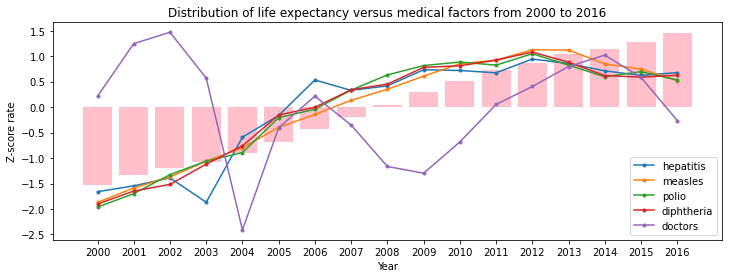

In [57]:
def field_plot(df, title, color='pink'):   
    plt.figure(figsize=(12,4))
    years = df.index
    plt.bar(years, df['life_expect'], color=color)
    
    plt.plot(df.iloc[:,1:], marker='.')
    plt.xticks(ticks=years, labels=years)
    plt.legend(df.iloc[:, 1:])
    
    plt.xlabel('Year')
    plt.ylabel('Z-score rate')
    
    plt.title(title)
    plt.show()
    
field_plot(medical_mean_df, 'Distribution of life expectancy versus medical factors from 2000 to 2016')

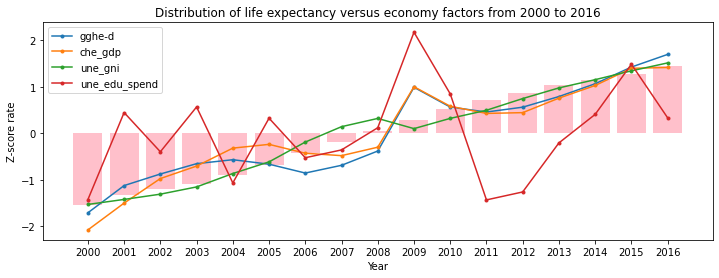

In [58]:
field_plot(eco_mean_df, 'Distribution of life expectancy versus economy factors from 2000 to 2016')

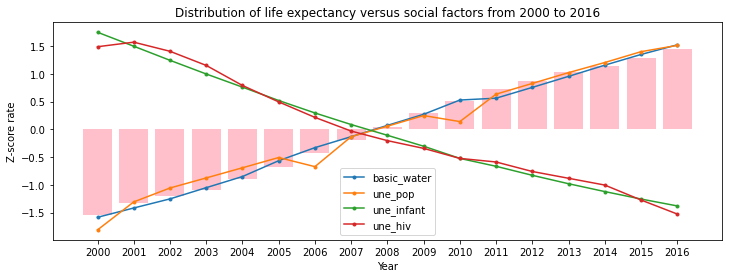

In [59]:
field_plot(social_mean_df, 'Distribution of life expectancy versus social factors from 2000 to 2016')

**Nhận xét:**
- Ở lĩnh vực y tế và kinh tế, ta thấy có 2 cột dữ liệu biến động rất lớn là `doctors` và `une_edu_spend`. Sau khi xem xét lại thì nhận thấy có đến hơn 40% missing ratio. Để đánh giá được chính xác hơn, ta sẽ quyết định loại 2 cột này ra khỏi khảo sát.
- Ở lĩnh vực xã hội, có 2 cột thể hiện rõ sự nghịch biến là `une_infant` và `une_hiv`. Trực quan hóa dữ liệu và nhận thấy sự nghịch biến này là tốt, nhưng để có thể xét sự ảnh hưởng rõ ràng của chúng đến `life_expect`, ta phải biến đổi cho chúng về một chuẩn đồng biến. Ta sẽ tiến hành làm điều này bằng cách nhân 2 cột này cho -1.
- Còn lại, các cột đều thể hiện khá rõ sự đồng biến, ít nhiều có thể đặt giả thuyết là việc đầu tư cho các lĩnh vực có thể làm tăng tuổi thọ kì vọng. Ta sẽ làm rõ hơn để có thể đi đến kết luận ở các bước phân tích sau.

**Tiến hành tiền xử lý thêm**

In [60]:
medical_df = medical_df.drop(labels='doctors', axis=1) # Loại cột 'doctors'

In [61]:
eco_df = eco_df.drop(labels='une_edu_spend', axis=1) # Loại cột 'une_edu_spend'

In [62]:
# Biến đổi 2 cột này về 1 chuẩn đồng biến với 'life_expect'
pd.options.mode.chained_assignment = None  # default='warn'
social_df['une_infant'] = social_df['une_infant'] * -1
social_df['une_hiv'] = social_df['une_hiv'] * -1
social_df

,country,region,year,life_expect,basic_water,une_pop,une_infant,une_hiv
0,Angola,Africa,2000,47.33730,41.14431,16395.473,-122.2,-1.0
1,Angola,Africa,2001,48.19789,42.25467,16945.753,-118.9,-1.1
2,Angola,Africa,2002,49.42569,43.37680,17519.417,-115.1,-1.2
3,Angola,Africa,2003,50.50266,44.36387,18121.479,-110.8,-1.3
4,Angola,Africa,2004,51.52863,45.35134,18758.145,-106.2,-1.3
...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,Western Pacific,2012,64.49448,72.07056,6444.530,-47.5,-0.3
3107,Lao People's Democratic Republic,Western Pacific,2013,64.79716,74.05544,6541.304,-45.6,-0.3
3108,Lao People's Democratic Republic,Western Pacific,2014,65.10757,76.02924,6639.756,-43.7,-0.3
3109,Lao People's Democratic Republic,Western Pacific,2015,65.45008,77.99142,6741.164,-42.0,-0.3


In [63]:
# Tính lại trung bình và chuẩn hóa theo z-score
new_social_mean_df = social_df.groupby('year').mean()
new_social_mean_df = normalize_df(new_social_mean_df)

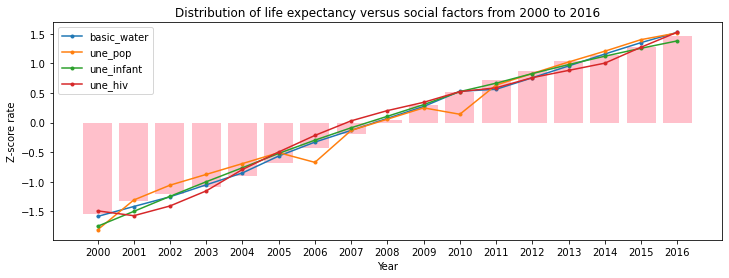

In [64]:
field_plot(new_social_mean_df, 'Distribution of life expectancy versus social factors from 2000 to 2016')

##### Chuẩn hóa thành 3 cột điểm cho mỗi lĩnh vực y tế, kinh tế, xã hội và khảo sát sự tương quan của chúng với tuổi thọ kì vọng

Các bước thực hiện:
- **Bước 1:** Tính điểm của mỗi lĩnh vực bằng cách lấy mean tất cả các cột trong cùng 1 dòng của các dataframe sau khi chuẩn hóa
- **Bước 2:** Lưu điểm của cả 3 lĩnh vực vào dataframae mới là `field_rate_df`
- **Bước 3:** Scatter plot trên từng khu vực để xem mối liên hệ giữa các cột điểm với life expectancy

**Bước 1:** Tính điểm của mỗi lĩnh vực bằng cách lấy mean tất cả các cột trong cùng 1 dòng của các dataframe sau khi chuẩn hóa

Sau vài bước xử lý, mỗi lĩnh vực vẫn còn bao gồm các cột, và nếu ta trực quan hóa từng yếu tố cho lần lượt các quốc gia hay khu vực sẽ tốn rất nhiều biểu đồ. Vì vậy ta sẽ chuẩn hóa các cột trong 1 lĩnh vực về chung 1 hệ điểm. 

Điều này có thể đạt được khi chuẩn hóa toàn bộ cột trong tập dữ liệu theo z-score, sau đó lấy mean các giá trị của cột trong cùng một dòng (axis=1), ta sẽ có được số điểm của lĩnh vực đó của 1 quốc gia trong 1 năm.

In [65]:
 def rate_df(df1, df2, df3, num_cols = 4):
    res_df = df1.iloc[:,:num_cols]
    res_df['medical_rate'] = normalize_df(df1.iloc[:,num_cols:]).mean(axis=1, skipna=True)
    res_df['eco_rate'] = normalize_df(df2.iloc[:,num_cols:]).mean(axis=1, skipna=True)
    res_df['social_rate'] = normalize_df(df3.iloc[:,num_cols:]).mean(axis=1, skipna=True)
    return res_df

**Bước 2:** Lưu điểm của cả 3 lĩnh vực vào dataframae mới là `field_rate_df`

In [66]:
field_rate_df = rate_df(medical_df, eco_df, social_df)
field_rate_df

,country,region,year,life_expect,medical_rate,eco_rate,social_rate
0,Angola,Africa,2000,47.33730,-3.837163,-1.116613,-1.355450
1,Angola,Africa,2001,48.19789,-2.830994,-0.623084,-1.315739
2,Angola,Africa,2002,49.42569,-2.877954,-0.883696,-1.271329
3,Angola,Africa,2003,50.50266,-3.249236,-0.828087,-1.224114
4,Angola,Africa,2004,51.52863,-3.316238,-0.731374,-1.168688
...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,Western Pacific,2012,64.49448,-0.581019,-1.162872,-0.260739
3107,Lao People's Democratic Republic,Western Pacific,2013,64.79716,-0.036126,-1.068051,-0.217670
3108,Lao People's Democratic Republic,Western Pacific,2014,65.10757,0.110073,-1.077387,-0.174743
3109,Lao People's Democratic Republic,Western Pacific,2015,65.45008,-0.305723,-1.020977,-0.133764


**Bước 3:** Scatter plot trên từng khu vực để xem mối liên hệ giữa các cột điểm với life expectancy

In [67]:
regions = life_exp_pro_df['region'].unique()

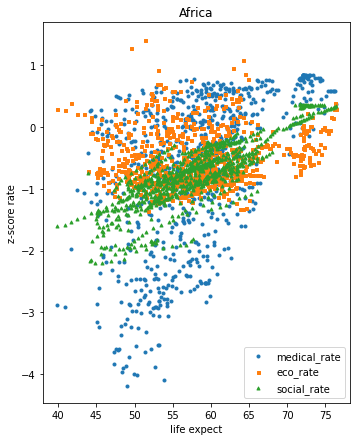

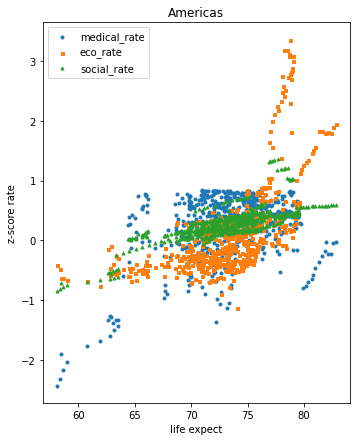

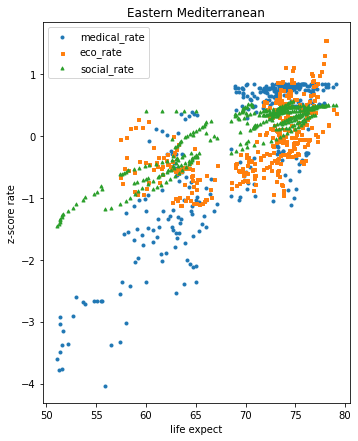

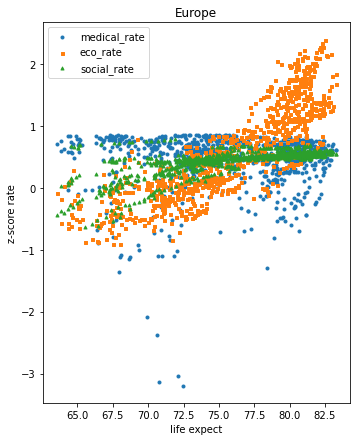

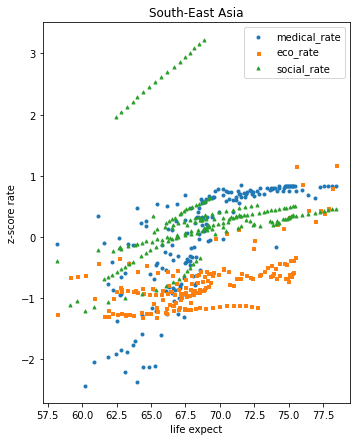

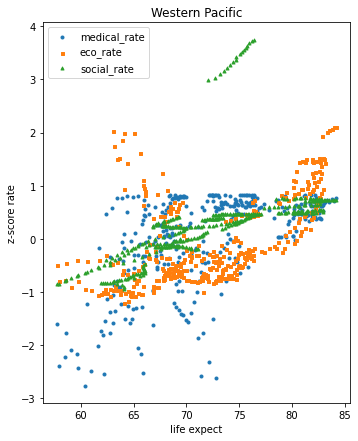

In [68]:
def rate_df_scatter(df, name):
    plt.figure(figsize=(5.5,7))
    plt.scatter(x=df['life_expect'], y=df['medical_rate'], label='medical_rate', marker='o', s=9)
    plt.scatter(x=df['life_expect'], y=df['eco_rate'], label='eco_rate', marker='s', s=9)
    plt.scatter(x=df['life_expect'], y=df['social_rate'], label='social_rate', marker='^', s=9)
    plt.xlabel('life expect')
    plt.ylabel('z-score rate')
    plt.legend()
    plt.title(name)
for region in regions:
    region_df = field_rate_df[field_rate_df['region'] == region]
    rate_df_scatter(region_df, region)

**Nhận xét:** Qua các biểu đồ plot thì khá rõ ràng là khi càng đầu tư phát triển cả 3 lĩnh vực thì tuổi thọ kì vọng cũng có xu hướng tăng thêm. Tuy nhiên để có thể đi đến kết luận rõ ràng, ta có thể dùng phương pháp đặt ra các hypothesis và phản chứng để kiểm tra lại giả thuyết đặt ra (các lĩnh vực có ảnh hưởng đến tuổi thọ trung bình). 

**Hypothesis**

- **Bước 1:** Đặt ra hypothesis: Xét theo nhóm quốc gia. Nếu các lĩnh vực có ảnh hưởng đến tuổi thọ kì vọng, thì quốc gia có tuổi thọ càng cao thì điểm tất cả các lĩnh vực sẽ càng cao.
- **Bước 2:** Khảo sát 10 nước có trung bình tuổi thọ kì vọng cao nhất và thấp nhất trong khu vực Europe.
- **Bước 3:** Dùng bidirectional bar chart thể hiện mối tương quan giữa tuổi thọ kì vọng và điểm của mỗi lĩnh vực để kiểm định giả thuyết ban đầu.

Ta sẽ đặt ra 1 giả thuyết là các lĩnh vực thực sự có ảnh hưởng đến tuổi thọ kì vọng, và nếu như giả thuyết này đúng thì khi ta sắp xếp 1 nhóm các nước có mức tuổi thọ tăng dần thì điểm của từng lĩnh vực cũng ít nhiều có xu hướng tăng theo.

Như đã khảo sát ở câu hỏi 1 thì tuổi thọ kì vọng của khu vực Europe là cao nhất. Ta xét 10 nước có tuổi thọ kì vọng cao nhất và thấp nhất trong khu vực này.

In [69]:
def region_df_subplot(df, title):
    for column in df.columns.to_list()[1:]:
        fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
        fig.suptitle(title)
        y = np.arange(df[column].size)
    
        axes[0].set(yticks=y, yticklabels=df[column].index.to_numpy())
        axes[0].yaxis.tick_right()
        
        axes[0].barh(y, 
                    df['life_expect'])
        #axes[0].invert_xaxis()
        axes[1].barh(y, 
                     df[column], 
                     align='center')
        
        axes[1].set_xlabel(column)
        axes[0].set_xlabel('life expect')
        fig.tight_layout()

In [70]:
def get_region_df(df, region=None):
    if region is not None:
        df = df[df['region'] == region]
    df = df.groupby('country').mean()
    df = df.iloc[:,-4:]
    return df

europe_df = get_region_df(field_rate_df, 'Europe')
europe_df = normalize_df(europe_df)

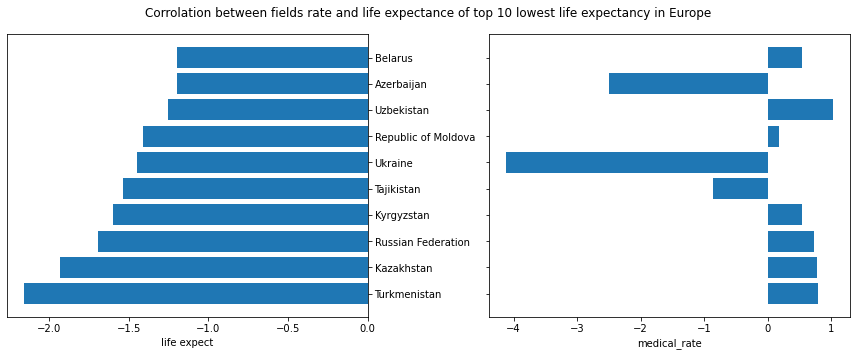

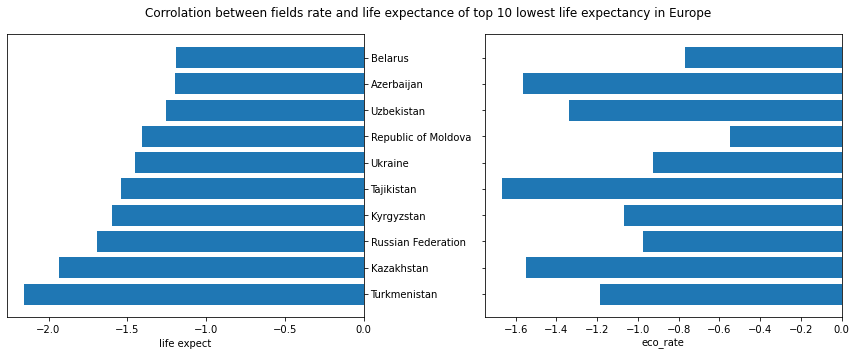

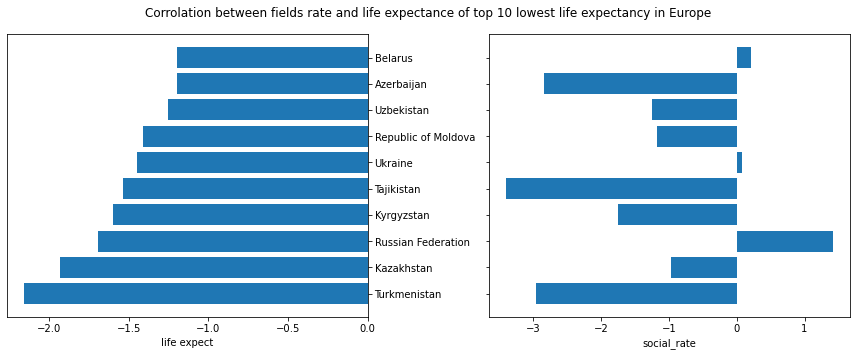

In [71]:
df = europe_df.sort_values('life_expect').iloc[:10, :]
region_df_subplot(df,'Corrolation between fields rate and life expectance of top 10 lowest life expectancy in Europe')

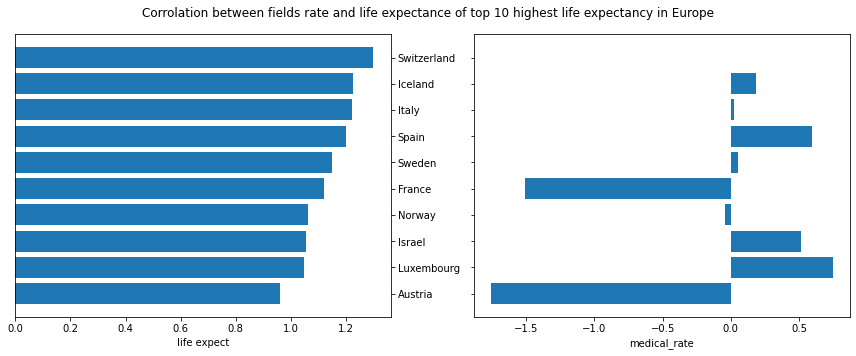

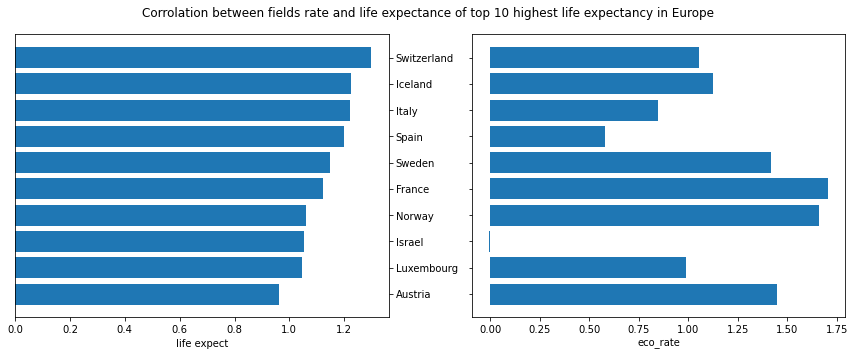

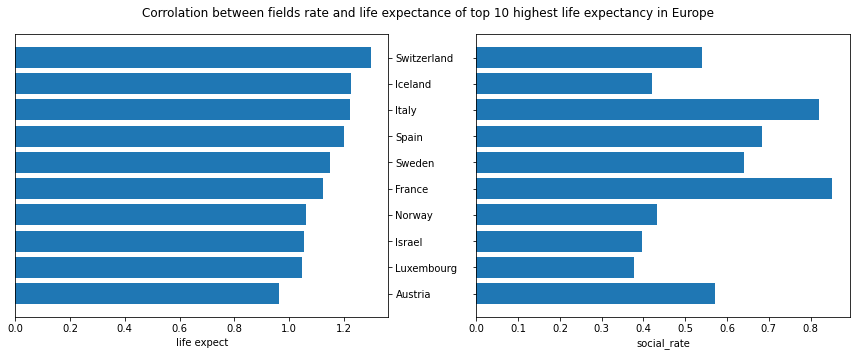

In [72]:
df = europe_df.sort_values('life_expect').iloc[-10:, :]
region_df_subplot(df, 'Corrolation between fields rate and life expectance of top 10 highest life expectancy in Europe')

**Nhận xét:** Nhận thấy mặc dù xét các nhóm nước với tuổi thọ kì vọng sắp xếp tăng dần, các điểm chuẩn mỗi lĩnh vực lại phân bố không đồng đều và không theo bất cứ trật tự nào (tăng giảm lộn xộn). Như vậy ta có thể bác bỏ giả thuyết đặt ra là "Nếu các lĩnh vực có ảnh hưởng đến tuổi thọ kì vọng, thì quốc gia có tuổi thọ càng cao thì điểm tất cả các lĩnh vực sẽ càng cao", dù giữa chúng có mức độ đồng biến cao.

##### Xét các lĩnh vực về y tế, kinh tế, xã hội ở Việt Nam qua các năm

Các bước thực hiện: 
* **Bước 01:** Lấy ra các dòng dữ liệu của Việt Nam (theo 3 lĩnh vực y tê, kinh tế, xã hội).
* **Bước 02:** Vẽ biểu đồ thể hiện phân phối tuổi thọ kì vọng của Việt Nam theo các nhân tố.
* **Bước 03:** Nhận xét và tìm hiểu nguyên nhân.

**Bước 01:** Lấy ra các dòng dữ liệu của Việt Nam (theo 3 lĩnh vực y tê, kinh tế, xã hội).

In [73]:
vietnam_field_df = field_rate_df[field_rate_df['country'] == 'Viet Nam']
vietnam_field_df

,country,region,year,life_expect,medical_rate,eco_rate,social_rate
2856,Viet Nam,Western Pacific,2000,73.34433,0.667364,-0.639407,0.193558
2857,Viet Nam,Western Pacific,2001,73.61745,0.689179,-0.547101,0.213753
2858,Viet Nam,Western Pacific,2002,73.94917,0.099707,-0.674214,0.234694
2859,Viet Nam,Western Pacific,2003,74.26300,0.375280,-0.680839,0.253693
2860,Viet Nam,Western Pacific,2004,74.52848,0.625725,-0.623313,0.271689
2861,Viet Nam,Western Pacific,2005,74.72758,0.543230,-0.562287,0.288699
2862,Viet Nam,Western Pacific,2006,74.88196,0.479580,-0.506738,0.299295
2863,Viet Nam,Western Pacific,2007,75.02741,-0.130236,-0.494313,0.315262
2864,Viet Nam,Western Pacific,2008,75.16173,0.342458,-0.530200,0.330260
2865,Viet Nam,Western Pacific,2009,75.28961,0.642458,-0.517907,0.344296


**Bước 02:** Vẽ biểu đồ thể hiện phân phối tuổi thọ kì vọng của Việt Nam theo các nhân tố.

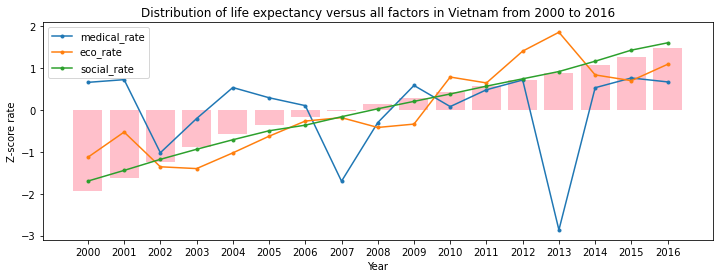

In [74]:
vietnam_field_df = normalize_df(vietnam_field_df.set_index('year'))
field_plot(vietnam_field_df, 'Distribution of life expectancy versus all factors in Vietnam from 2000 to 2016')

**Nhận xét:** 
* Nhìn chung, xu hướng tuổi thọ của Việt Nam theo các nhân tố cũng tuân theo xu hướng của thế giới, nghĩa là tuổi thọ không phụ thuộc vào một lĩnh vực nào cụ thể. 
* Nhận thấy các điểm bất thường trong lĩnh vực y tế có điểm thấp bất thường vào các năm 2002, 2007 và 2013. Ta sẽ xem xét các cột về y tế để tìm ra nguyên nhân gây ra sự sụt giảm này

In [75]:
medical_df[medical_df['country'] == 'Viet Nam']

,country,region,year,life_expect,hepatitis,measles,polio,diphtheria
2856,Viet Nam,Western Pacific,2000,73.34433,NaN,97.0,96.0,96.0
2857,Viet Nam,Western Pacific,2001,73.61745,NaN,98.0,96.0,96.0
2858,Viet Nam,Western Pacific,2002,73.94917,NaN,96.0,92.0,75.0
2859,Viet Nam,Western Pacific,2003,74.26300,78.0,93.0,96.0,99.0
2860,Viet Nam,Western Pacific,2004,74.52848,94.0,97.0,96.0,96.0
2861,Viet Nam,Western Pacific,2005,74.72758,94.0,95.0,94.0,95.0
2862,Viet Nam,Western Pacific,2006,74.88196,93.0,93.0,94.0,94.0
2863,Viet Nam,Western Pacific,2007,75.02741,67.0,83.0,92.0,92.0
2864,Viet Nam,Western Pacific,2008,75.16173,87.0,92.0,93.0,93.0
2865,Viet Nam,Western Pacific,2009,75.28961,94.0,97.0,97.0,96.0


**Bước 03:** Nhận xét và tìm hiểu nguyên nhân.

- Tỉ lệ tiêm Vaccine Viêm gan B (`hepatitis`) cho trẻ sụt giảm mạnh từ 93% năm 2006 xuống 67% năm 2007, và từ 97% năm 2012 xuống 59% vào năm 2013. Sau khi research các nguồn tài liệu, nhóm em đã tìm ra nguyên nhân chính cho sự sụt giảm tỉ lệ tiêm vaccine viêm gan B ở trẻ vào năm [2007](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4514219/?fbclid=IwAR1_wOOPBvw-HvLGwrWSfHOJCWvOnvcAQlOWFlqtsz9Zbjksk7MkhNbCSak) và [2013](https://pubmed.ncbi.nlm.nih.gov/26055296/) đều là do các triệu chứng bất lợi sau tiêm chủng (Adverse Events Following Immunization), khiến bộ y tế phải tạm trì hoãn các kế hoạch tiêm chủng trên toàn quốc.

- Tỉ lệ tiêm Vaccine Sởi (`measles`) giảm từ 93% năm 2006 xuống 83% năm 2007. Nguyên nhân chính là do sự kiện cạn kiệt nguồn cung vaccine trên toàn quốc vào năm [2007](https://watermark.silverchair.com/jir092.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAtAwggLMBgkqhkiG9w0BBwagggK9MIICuQIBADCCArIGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMmAmS2Mh87180ozd2AgEQgIICg588SylEXEN9QImx7wGoRl2V9kvcxQnkcKTdaaz6w-4SmF9s_5SQGgDhx2RdCjDVe6yIeIWbFWvrSal8GUkcQMYVxB7w3PJtt8vzA8xFvx6e2kFPNEE6HCpepqf9DKUWui8wHNtf6HV1T4dWAeCfBxOKTNJH7_tw2ol-efxNZxzLLVXUt8vvZTsKnoIqml81ERpuFnUC9di1hpzxnkPfg8_l_2IX2pWkhpq_ys3CPWZj_3JlCqld0ZdpnYSCG3KVOheGXcGLJE1ZWTDyHPtX0sR6yecbVx1dsiAznF2apt2TMEMlo2I2D-5BZrv9aX_HWgkJ2zRC6PAXw3dS-0LpF2nBUKzlje_KK7GYxOJY3p3cEuCWaGtGXZj7yghTRpNaPlwOTel3agBwqqEiEN6mBK3VgFF_Sy0Bq5Bv2nVj6TnsE2B5Vthfxmm-KtuKYR-qBiC5tkh5lAnsPKbm3Zw30VpmvtyYC-T5RFCdAjxZC-4EjsXgqiHfpIhUa6faAan_joBQKsbHlet3ZuZJoA39pEcQjUITxPnylLJpkmOnjsIGmKJqMHWCVAWF1KWOgrn8W0VlAEzcYQLcw8ut3NgS9mg4OOlJZMkE0vV_XUeGtGrFP52IjrdrhTFfJJ_Wad6LpS1tC1fWTsSohIZBR83g6xZLHHGqzSGv26RLvkioFFeFpm8JsTaXmhqlwZu_O8ACNzj9uG_rzfuxNq2IM5Y89IjjFucQQPeQJMLgqQHtdfiEeziNoSdYzi4htpyLXYJFfjlub_lBWoY4by0C0cN51vAiROSE-SwBIS7FsRrFaBfe3Rx9ZWTcDdgWusbX8d1IS7yMc-uUfYaafiSGWMpDfoZhoRM&fbclid=IwAR2L1a3xlLSQdT9mf7e1UC6iq9XZKim7UDvmnu9rdDEWpFfvm2kZhfXBqvU). Trích dẫn theo nguồn tin: 
> "excluding 2007, when reported first-dose MCV (MCV1) coverage was 83% because of a nationwide stock out"
- Tỉ lệ tiêm bạch hầu, uốn ván, ho gà năm 2002 là 75%, giảm 21% so với năm 2001. Tuy nhiên, nhóm vẫn chưa tìm hiểu được nguyên nhân.

#### Câu hỏi 3: Các vấn đề về y tế, kinh tế, xã hội ở các quốc gia đang phát triển và các quốc gia phát triển có gì khác biệt không? Nếu có thì sự khác biệt này như thế nào?

**Ý nghĩa khi trả lời câu hỏi:** Các nhóm quốc gia đang phát triển và phát triển sẽ có tốc độ cũng như điều kiện sống khác nhau, phân tích sự khác nhau giữa hai nhóm này là tiền đề để hiểu được nguyên nhân vì sao có sự khác biệt như vậy, từ đó có thể sinh ra các giải pháp giúp cân bằng tuổi thọ, chẳng hạn như các nước phát triển nên giúp gì cho các nước đang phát triển, các nước đang phát triển có nên học hỏi gì từ các nước phát triển hay không,...

Các bước thực hiện:
* **Bước 1:** Thêm cột `status` vào dữ liệu và lưu vào dataframe mới `life_exp_status_df`. Khảo sát cột `status` mới thêm xem có gì bất thường không?
* **Bước 2:** Tính tỉ lệ các nước phát triển và các nước đang phát triển, vẽ biểu đồ trực quan.
* **Bước 3:** Trực quan hóa sự biến động tuổi thọ của 2 nhóm quốc này từ năm 2000 đến năm 2016.
* **Bước 4:** Chuẩn hóa các lĩnh vực y tế, kinh tế, xã hội theo z-score và trực quan hóa.
* **Bước 5:** Phân tích sự khác nhau về tỉ lệ tiêu thụ rượu và tỷ lệ vaccine ở 2 nhóm quốc gia.

**Bước 1:** Thêm cột `status` vào dữ liệu và lưu vào dataframe mới `life_exp_status_df`. Khảo sát cột `status` mới thêm xem có gì bất thường không?

* Để thêm được cột `status` thể hiện tình trạng phát triển của một quốc gia, nhóm sử dụng thêm 1 file data để hỗ trợ. Dữ liệu này cũng nói về các nhân tố ảnh hưởng đến tuổi thọ của các quốc gia (nguồn gốc dữ liệu cũng từ WHO). Dữ liệu này được tải trên Kaggle tại [đây](https://www.kaggle.com/kumarajarshi/life-expectancy-who). License này trên Kaggle là "Other (specified in description)", nhóm có đọc qua Discussion của Dataset này, thấy có 1 độc giả hỏi về license của dataset và đuợc tác giả trả lời là "Used from GHO data repository" (nguồn tại [đây](https://www.kaggle.com/kumarajarshi/life-expectancy-who/discussion/82337)); GHO là kho dữ liệu công khai, có thể dùng làm nghiên cứu được, do đó nhóm sử dụng dataset này trong phạm vi học tập, đồ án.

* Sau đó nhóm load file CSV dữ liệu vào dataframe `status_countries_df`, chỉ lấy 2 cột là `Country` và `Status` rồi loại bỏ các hàng bị trùng (vì mỗi nước được khảo sát nhiều năm nên xảy ra trùng) và reset index. Sau cùng nhóm xóa cột tên `index` sau khi reset. 

In [76]:
status_countries_pd = pd.read_csv('./Data/DataForQuestion/Life Expectancy Data.csv')[['Country','Status']]
status_countries_pd = status_countries_pd.drop_duplicates().reset_index().drop(columns = 'index')
status_countries_pd = status_countries_pd.rename(columns = {'Country': 'country', 'Status': 'status'})
status_countries_pd

,country,status
0,Afghanistan,Developing
1,Albania,Developing
2,Algeria,Developing
3,Angola,Developing
4,Antigua and Barbuda,Developing
...,...,...
188,Venezuela (Bolivarian Republic of),Developing
189,Viet Nam,Developing
190,Yemen,Developing
191,Zambia,Developing


* Gộp 2 dataframe `life_exp_pro_df` chứa các thông tin sau khi tiền xử lý và `status_countries_df` chứa thông tin trạng thái phát triển của quốc gia vào dataframe `life_exp_status_df` bằng cách sử dụng phép kết trái trên cột `country`.

In [77]:
life_exp_status_df = pd.merge(left=life_exp_pro_df, right=status_countries_pd, \
                              left_on='country', right_on='country', how='left')
life_exp_status_df.shape

(3110, 27)

* Kiểm tra xem cột `status` đang chứa kiểu dữ liệu gì?

In [78]:
print(open_object_dtype(life_exp_status_df['status']))

{<class 'str'>, <class 'float'>}


**Nhận xét:** Cột dữ liệu `status` thể hiện tình trạng phát triển / đang phát triển đang chứa 2 kiểu dữ liệu là `str` và `float`. Nguyên nhân có thể là do tên quốc gia trong dataframe gốc không khớp với dòng nào trong dataframe chứa cột `status`. 

* Kiểm tra xem đó là nước nào và cột `status` đang mang giá trị gì? 

In [79]:
idx_nan = (life_exp_status_df['status'].map(type) != str).values.nonzero()
idx_nan

(array([ 221,  222,  223,  224,  225,  226,  227,  228,  229,  230,  231,
         232,  233,  234,  235,  236,  237, 2090, 2091, 2092, 2093, 2094,
        2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105,
        2106]),)

In [80]:
print(life_exp_status_df.iloc[idx_nan]['country'].unique())
life_exp_status_df.iloc[idx_nan].head()

['Eswatini' 'Republic of North Macedonia']


,country,country_code,region,year,life_expect,life_exp60,adult_mortality,age1-4mort,alcohol,bmi,...,doctors,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend,status
221,Eswatini,SWZ,Africa,2000,48.63049,15.34542,539.9345,0.011565,6.80285,25.5,...,NaN,2.41081,4.60952,1005.435,79.8,47.490,24.6,5000.0,5.50848,NaN
222,Eswatini,SWZ,Africa,2001,46.96241,15.24818,580.2845,0.012185,6.69942,25.6,...,1.766,2.38432,5.13895,1013.609,81.3,45.799,25.3,5360.0,4.83824,NaN
223,Eswatini,SWZ,Africa,2002,45.73096,15.18800,610.3154,0.012570,5.50550,25.6,...,NaN,2.42258,5.52298,1019.059,81.7,44.410,25.8,5310.0,4.44087,NaN
224,Eswatini,SWZ,Africa,2003,44.82668,15.15227,632.8162,0.012845,5.62489,25.7,...,1.564,2.91704,6.37864,1022.802,81.5,43.372,26.1,5480.0,5.81677,NaN
225,Eswatini,SWZ,Africa,2004,44.22733,15.13096,649.5695,0.013000,5.75843,25.8,...,1.666,3.02394,6.81432,1026.286,80.0,42.731,26.2,5930.0,5.40161,NaN


**Nhận xét:** Hai quốc gia Eswatini và Republic of North Macedonia có giá trị cột status là NaN. 

**Tiền xử lý**

Giá trị NaN là nguyên nhân khiến cột `status` có thêm kiểu dữ liệu là `float`. Nguyên nhân có giá trị NaN là có 2 nước ở dataframe gốc không khớp với dòng nào trong dữ liệu về `status`. Theo quan sát của nhóm, là do có sự khác biệt về tên ở 2 dataframe ở 2 nước này. Cụ thể: 
- Nước Eswatini, viết tắt là SWZ, hay còn gọi là Swaziland (hợp lý với tên viết tắt), nguồn tại [đây](https://en.wikipedia.org/wiki/Eswatini). 
- Nước Republic of North Macedonia, viết tắt là MKD, còn được viết tắt là FYROM (The former Yugoslav republic of Macedonia) (theo nguồn tại [đây](https://www.wikidata.org/wiki/Q221)).

Do đó, thực hiện tiền xử lý thủ công với 2 trường hợp này. Tiến hành cập nhật trạng thái của Swaziland cho Eswatini và của The former Yugoslav republic of Macedonia cho Republic of North Macedonia.

In [81]:
status_eswatini = status_countries_pd[status_countries_pd['country'] ==\
                            'Swaziland']['status'].values[0]
life_exp_status_df.update(life_exp_status_df.loc[life_exp_status_df['country'] == 'Eswatini']['status'] \
                          .replace(np.nan, status_eswatini))

status_mace = status_countries_pd[status_countries_pd['country'] ==\
                            'The former Yugoslav republic of Macedonia']['status'].values[0]
life_exp_status_df.update(life_exp_status_df.loc[life_exp_status_df['country'] ==\
                                                 'Republic of North Macedonia']['status'] \
                          .replace(np.nan, status_mace))

* Kiểm tra lại kiểu dữ liệu của cột `status`

In [82]:
print(open_object_dtype(life_exp_status_df['status']))

{<class 'str'>}


**Nhận xét:** Đã không còn kiểu dữ liệu `float`, cho thấy đã chuyển đổi thành công.

**Bước 2:** Tính tỉ lệ các nước phát triển và các nước đang phát triển, vẽ biểu đồ trực quan.

* Ta tiến hành gom nhóm theo `status`, do dữ liệu khảo sát 17 năm, nên ta cần chia cho số lượng năm khảo sát để ra được số quốc gia. 

In [83]:
num_countries_status = life_exp_status_df[['status']].groupby('status').size() / len(YEARS)

**Nhận xét:** Có 32 nước phát triển và 151 nước đang phát triển trong tổng số 183 quốc gia được khảo sát. Số lượng nước đang phát triển có giá trị lẻ (~150.94) là do đã loại bỏ 1 dòng như đã trình bày ở phần Khám phá dữ liệu và tiền xử lý (năm 2010 của Haiti).

* Minh họa bằng biểu đồ tỉ lệ nói trên.

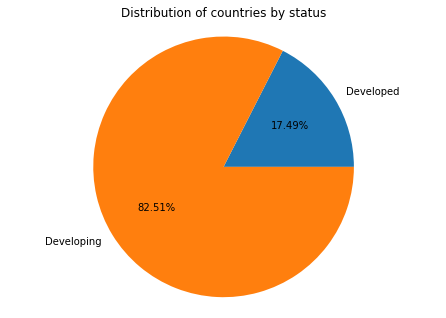

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(num_countries_status.values, labels = num_countries_status.index,autopct='%1.2f%%')
ax.axis('equal')
ax.set_title('Distribution of countries by status')
plt.show()

**Bước 3:** Trực quan hóa sự biến động tuổi thọ của 2 nhóm quốc này từ năm 2000 đến năm 2016.

In [85]:
life_exp_mean_status = life_exp_status_df.groupby(['year','status']). \
    agg(pd.Series.mean)['life_expect'].unstack(1)
life_exp_mean_status

status,Developed,Developing
year,,
2000,76.758001,64.182217
2001,77.088402,64.571092
2002,77.269439,64.801002
2003,77.453058,65.021095
2004,77.859988,65.348737
2005,77.918191,65.799000
2006,78.272366,66.286927
2007,78.438292,66.778520
2008,78.735332,67.213525


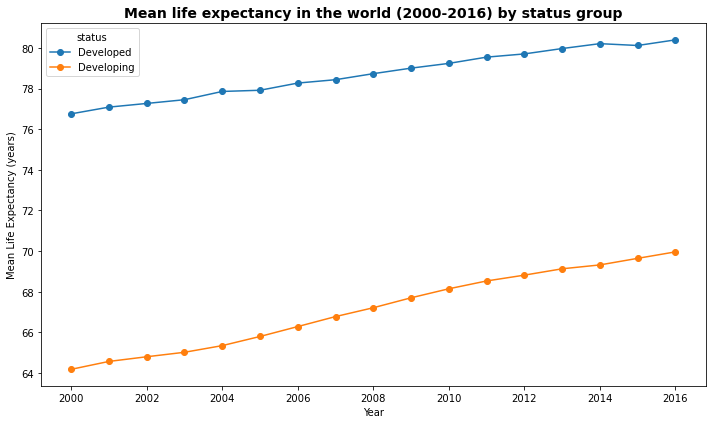

In [86]:
life_exp_mean_status.plot.line(ylabel='Mean Life Expectancy (years)', xlabel='Year',\
                          marker='o', legend=True, figsize=(10,6))
plt.title("Mean life expectancy in the world (2000-2016) by status group", weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

**Nhận xét:** 
* Tuổi thọ trung bình của các quốc gia phát triển cao hơn nhiều so với các quốc gia đang phát triển. Nguyên nhân dự đoán có thể là do các nước phát triển có điều kiện sinh sống tốt hơn, ít chịu ảnh hưởng bởi chiến tranh, nền kinh tế phát triển.
* Ngoài ra, dựa vào biểu đồ có thể thấy, tốc độ gia tăng tuổi thọ kì vọng của các nước đang phát triển mạnh hơn so với các nước phát triển (đường biểu diễn dốc hơn).

**Bước 4:** Chuẩn hóa các lĩnh vực y tế, kinh tế, xã hội theo z-score và trực quan hóa.


- Lấy ra những cột thuộc từng lĩnh vực

In [87]:
medical_status_df = life_exp_status_df[['country', 'region', 'year', 'life_expect', 'status',
                            'hepatitis', 'measles', 'polio', 'diphtheria']]
eco_status_df = life_exp_status_df[['country', 'region', 'year', 'life_expect', 'status',
                          'gghe-d', 'che_gdp', 'une_gni']]
social_status_df = life_exp_status_df[['country', 'region', 'year', 'life_expect', 'status',
                            'basic_water', 'une_pop', 'une_infant', 'une_hiv']]

* Chuẩn hóa theo z-score

In [88]:
field_rate_status_df = rate_df(medical_status_df, eco_status_df, social_status_df, num_cols=5)
field_rate_status_df

,country,region,year,life_expect,status,medical_rate,eco_rate,social_rate
0,Angola,Africa,2000,47.33730,Developing,-3.837163,-1.116613,0.184706
1,Angola,Africa,2001,48.19789,Developing,-2.830994,-0.623084,0.175825
2,Angola,Africa,2002,49.42569,Developing,-2.877954,-0.883696,0.162634
3,Angola,Africa,2003,50.50266,Developing,-3.249236,-0.828087,0.143236
4,Angola,Africa,2004,51.52863,Developing,-3.316238,-0.731374,0.115761
...,...,...,...,...,...,...,...,...
3105,Lao People's Democratic Republic,Western Pacific,2012,64.49448,Developing,-0.581019,-1.162872,-0.143004
3106,Lao People's Democratic Republic,Western Pacific,2013,64.79716,Developing,-0.036126,-1.068051,-0.134178
3107,Lao People's Democratic Republic,Western Pacific,2014,65.10757,Developing,0.110073,-1.077387,-0.125492
3108,Lao People's Democratic Republic,Western Pacific,2015,65.45008,Developing,-0.305723,-1.020977,-0.115150


* Tạo dataframe `status_field` để hỗ trực việc vẽ biểu đồ. Dataframe này cần hiển thị mỗi `rate` là 1 hàng, do đó ta cần `unstack` và `reset_index` để chuẩn hóa `field_rate_status_df`. Khi đó số dòng của dataframe mới là 3110 x 3 = 9330 dòng (với 3 là tương đương với 3 lĩnh vực). Vì thế, cần concat cột status 3 lần để đúng kích thước.

In [89]:
stt = pd.concat([field_rate_status_df['status'], field_rate_status_df['status'], \
                 field_rate_status_df['status']])

In [92]:
status_field = field_rate_status_df[['medical_rate','eco_rate','social_rate']].unstack(0)

status_field = status_field.reset_index()
status_field = status_field.rename(columns={'level_0':'type_rate', 0:'rate'}).drop(columns='level_1')
status_field.insert(status_field.shape[1],'status', stt.values)
status_field

,type_rate,rate,status
0,medical_rate,-3.837163,Developing
1,medical_rate,-2.830994,Developing
2,medical_rate,-2.877954,Developing
3,medical_rate,-3.249236,Developing
4,medical_rate,-3.316238,Developing
...,...,...,...
9325,social_rate,-0.143004,Developing
9326,social_rate,-0.134178,Developing
9327,social_rate,-0.125492,Developing
9328,social_rate,-0.115150,Developing


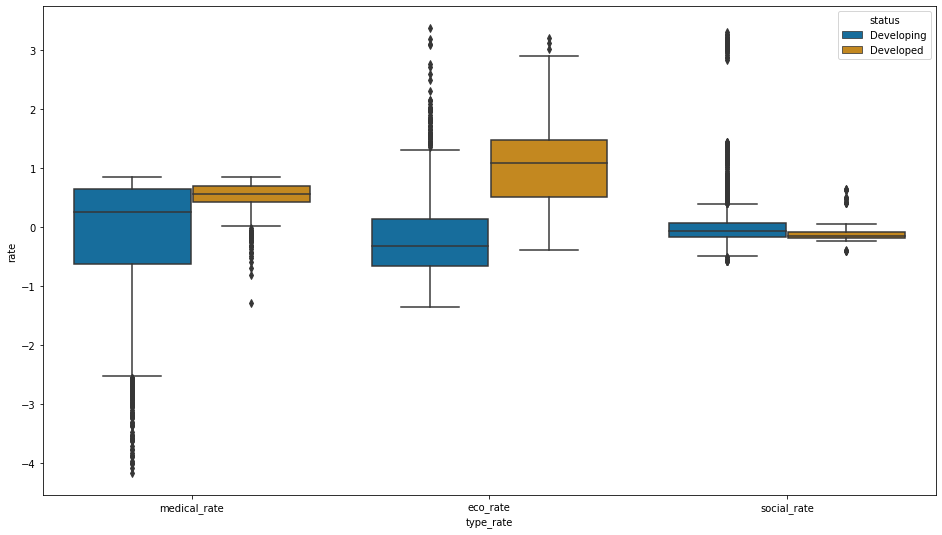

In [91]:
plt.subplots(figsize=(16,9))
sns.boxplot(y='rate', x='type_rate', 
                 data=status_field, 
                 palette="colorblind",
                 hue='status')
plt.show()

**Nhận xét**:
* Các quốc gia phát triển có nền kinh tế cao hơn các quốc gia đang phát triển, điều này rất phù hợp với thực tế vì để đạt được quốc gia phát triển cần phải thỏa nhiều điều kiện về kinh tế. 
* Sự khác biệt của 2 nhóm quốc gia này là ở y tế và xã hội, về mặt y tế, các quốc gia phát triển có tỉ lệ cao hơn, các nước đang phát triển đa số ở khu vực châu Phi nên khả năng y tế còn hạn chế, tuy nhiên các quốc gia đang phát triển cũng ngày càng chú trọng và quan tâm về y tế. Ngược lại với y tế, về xã hội, các quốc gia phát triển có tỉ lệ thấp hơn các quốc gia đang phát triển. Về mặt xã hội thì tỉ lệ tử và HIV/AIDS là thước đó chính, do đó các nước đang phát triển tổng quan sẽ có nhiều tiêu cực hơn các quốc gia phát triển.

**Bước 5:** Phân tích sự khác nhau về tỉ lệ tiêu thụ rượu và tỷ lệ vaccine ở 2 nhóm quốc gia.

Để làm rõ hơn sự khác nhau về y tế và xã hội của 2 nhóm quốc gia. Nhóm chọn nhân tố tỷ lệ nhiễm HIV/AIDS `une_hiv` và tỉ lệ tiêu thụ rượu `alcohol` cho xã hội và tỷ lệ tiêm vaccine ở lĩnh vực y tế. Tỉ lệ tiêm vaccine được thể hiện qua các cột `hepatitis`(tỷ lệ tiêm ngừa viêm gan siêu vi B (HepB) ở trẻ 1 tuổi), `measles` (tỷ lệ tiêm ngừa sởi mũi đầu tiên (MCV1) ở trẻ 1 tuổi), `polio` (tỷ lệ tiêm ngừa bại liệt (Pol3) ở trẻ 1 tuổi), `diphtheria` (tỷ lệ tiêm ngừa bạch hầu, uốn ván, ho gà ở trẻ 1 tuổi).

Ở bước này, ta trực quan hóa dữ liệu theo từng cột đã liệt kê, ứng với mỗi biểu đồ vẽ ra sẽ đi kèm với nhận xét.

**HIV/AIDS**

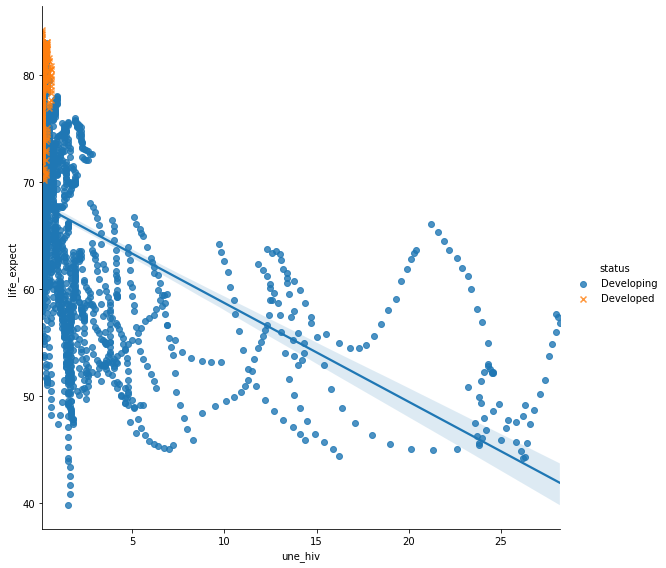

In [100]:
sns.pairplot(life_exp_status_df, x_vars=["une_hiv"], y_vars=["life_expect"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

**Nhận xét:** Biểu đồ cho thấy ở các nước đang phát triển tỷ lệ nhiễm HIV/AIDS vẫn còn cao, tuổi thọ kỳ vọng đang giảm nhanh. Điều này có thể là do dân số gia tăng và giáo dục còn hạn chế. Trong khi đó, các nước phát triển tỷ lệ nhiễm HIV/AIDS ít, tuổi thọ cao và có xu hướng tăng.

**Tiêu thụ rượu**

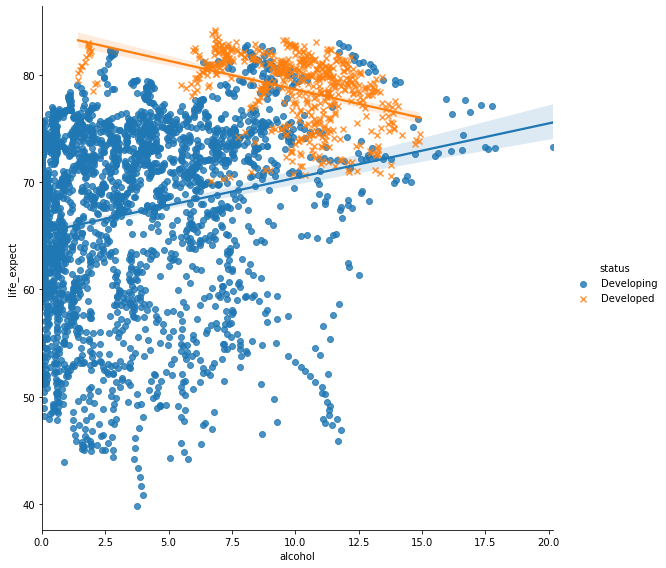

In [94]:
sns.pairplot(life_exp_status_df, x_vars=["alcohol"], y_vars=["life_expect"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

**Nhận xét:** Biểu đồ cho thấy ở các nước phát triển có tỷ lệ tiêu thụ rượu cao hơn các nước đang phát triển. Nguyên nhân có thể là các quốc gia phát triển có cuộc sống dư dả hơn, nên nhu cầu sử dụng rượu cũng tăng. Đây cũng có thể là lý do khiến mối quan hệ về tuổi thọ giữa các nước đang phát triển và tỷ lệ tiêu thụ rượu là tích cực (tuổi thọ cao, tiêu thụ rượu nhiều), ngược lại là tiêu cực với các quốc gia phát triển.

**Tỷ lệ tiêm ngừa viêm gan siêu vi B (HepB) ở trẻ 1 tuổi**

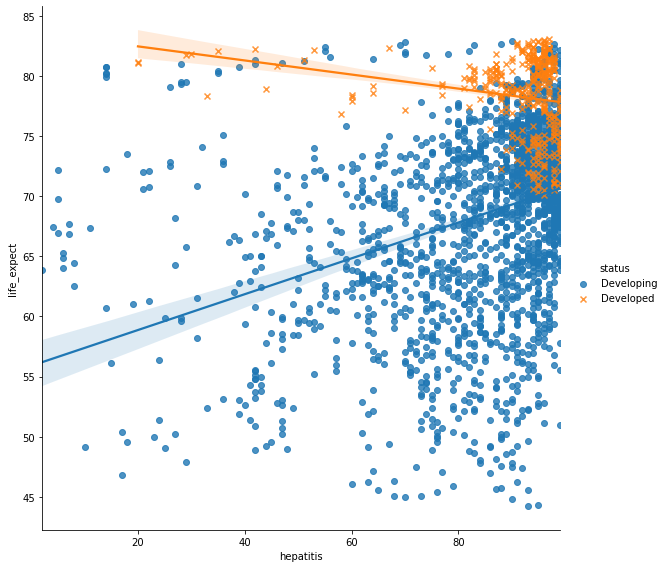

In [96]:
sns.pairplot(life_exp_status_df, x_vars=["hepatitis"], y_vars=["life_expect"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

**Nhận xét:** Tuổi thọ giảm nhẹ ở các nước phát triển trong khi ở các nước đang phát triển tuổi thọ đang có xu hướng tăng, có nghĩa là các nước đang phát triển đang thực hiện các biện pháp để sản xuất vaccine viêm gan B.

**Tỷ lệ tiêm ngừa sởi mũi đầu tiên (MCV1) ở trẻ 1 tuổi**

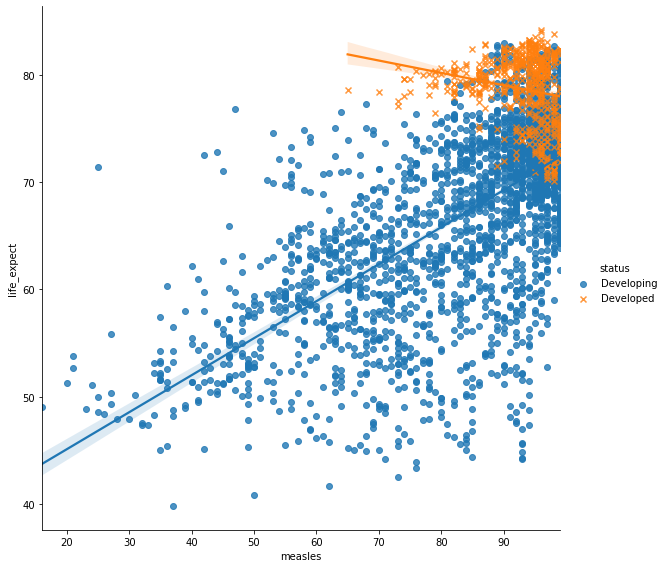

In [97]:
sns.pairplot(life_exp_status_df, x_vars=["measles"], y_vars=["life_expect"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

**Nhận xét:** Theo biểu đồ, các nước phát triển dường như có sẵn vaccine để tiêm ngừa bệnh sởi trong khi các nước đang phát triển tuổi thọ đang giảm dần, nguyên nhân có thể do thiếu nguồn lực để đối mặt bệnh sởi.

**Tỷ lệ tiêm ngừa bại liệt (Pol3) ở trẻ 1 tuổi**

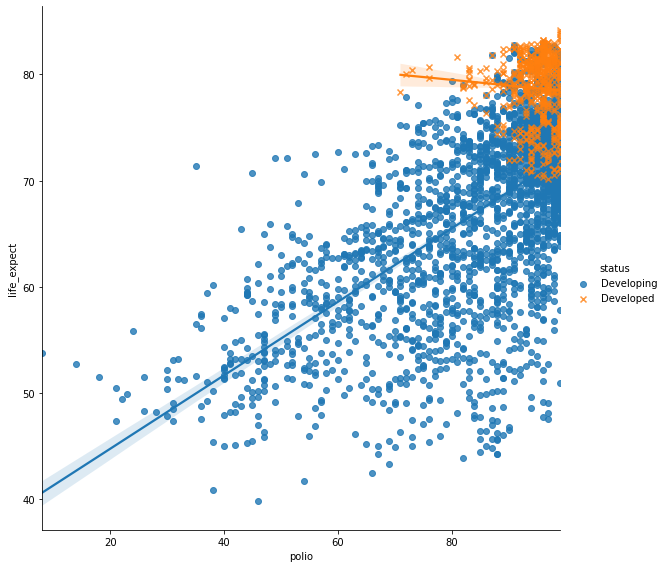

In [98]:
sns.pairplot(life_exp_status_df, x_vars=["polio"], y_vars=["life_expect"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

**Nhận xét:** Các nước phát triển dường như thành công trong việc tiêm chủng ngừa bại liệt (tỷ lệ tiêm cao và tuổi thọ kỳ vọng cao) trong khi ở các nước đang phát triển, ban đầu tuổi thọ thấp, tuy nhiên tuổi thọ đang xu hướng dần tăng lên. 

**Tỷ lệ tiêm ngừa bạch hầu, uốn ván, ho gà ở trẻ 1 tuổi**

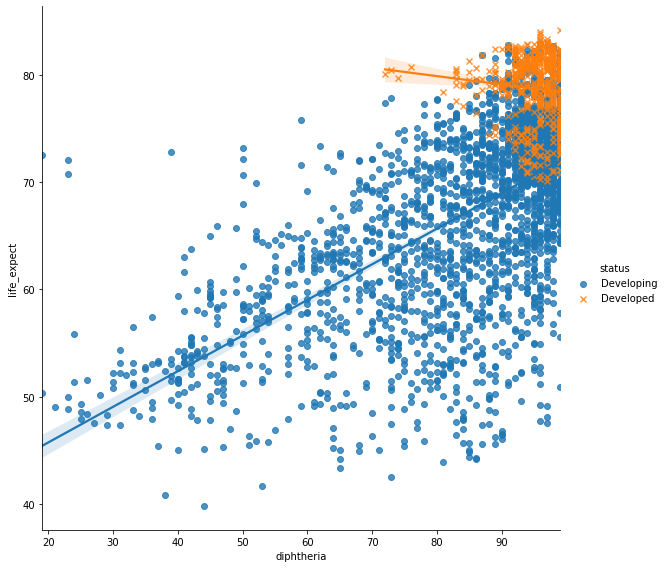

In [99]:
sns.pairplot(life_exp_status_df, x_vars=["diphtheria"], y_vars=["life_expect"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

**Nhận xét:** Biểu đồ này khá giống với biểu đồ tỷ lệ tiêm ngừa bại liệt, nên nhận xét đưa ra cũng tương tự như trên.

**Nhận xét chung:** 
* Các nước phát triển nên giúp đỡ các nước đang phát triển trong việc hỗ trợ cung cấp các loại vắc xin. Trong bối cảnh của đại dịch COVID-19, chúng ta cũng nhận thấy hành động giúp đỡ về vaccine của các quốc gia phát triển dành cho Việt Nam.
* Nhà nước nên đầu tư chăm sóc sức khỏe, đặc biệt có thể mở các chiến dịch miễn phí để cung cấp vắc-xin miễn phí cho người dân, đặc biệt là người nghèo.
* Nhà nước nên có các biện pháp xử lý với các trường hợp uống rượu quá mức vì nó ảnh hưởng không những đến sức khỏe bản thân mà còn ảnh hưởng đến gia đình, xã hội. 
* Nên nâng cao nhận thức để phòng tránh HIV/AIDS, tuyên truyền tác hại của rượu bia ngay từ khi trên ghế nhà trường.

## Nhìn lại quá trình làm đồ án

### Những khó khăn gặp phải

#### Trương Trọng Lộc

* Khó khăn trong việc sắp xếp các ý khi trả lời câu hỏi cho rõ ràng. 
* Tìm kiếm dataset vì trên Kaggle rất nhiều dataset, đồng thời phải tìm dataset có thể khai thác để đặt được đặt câu hỏi có ý nghĩa.
* Băn khoăn về các trường hợp xử lý ngoại thế, xử lý giá trị thiếu.

### Điều hữu ích học được

#### Trương Trọng Lộc

* Biết thêm được các sự kiện, cột mốc lịch sử khi phân tích các trường hợp outlier. 
* Vận dụng được nhiều các thư viện của Python, nhất là Pandas. 
* Biết thêm được nhiều biểu đồ, đồ thị phục vụ cho việc trực quan hóa dữ liệu. 
* Kỹ năng làm việc nhóm, quản lý thời gian.
* Biết và vận dụng được kỹ thuật z-score normalization.

### Nếu có thêm thời gian, nhóm sẽ:

---

## Tài liệu tham khảo

---